In [163]:
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, Normalize
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler

In [164]:
options_23 = pd.read_csv('options_2023.csv')

In [165]:
options_23

,Unnamed: 0,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,...,optionid,cfadj,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,ticker
0,0,101121.0,2023-05-19,AMD 230519C100000,1,2023-05-19,2023-05-19,C,100000.0,5.85,...,153034478.0,1.0,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD
1,1,101121.0,2023-05-19,AMD 230519C101000,1,2023-05-19,2023-05-19,C,101000.0,4.90,...,154060490.0,1.0,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD
2,2,101121.0,2023-05-19,AMD 230519C102000,1,2023-05-19,2023-05-19,C,102000.0,3.85,...,154060491.0,1.0,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD
3,3,101121.0,2023-05-19,AMD 230519C103000,1,2023-05-19,2023-05-19,C,103000.0,2.89,...,154060492.0,1.0,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD
4,4,101121.0,2023-05-19,AMD 230519C104000,1,2023-05-19,2023-05-19,C,104000.0,1.89,...,154060493.0,1.0,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005319,5005319,216684.0,2023-08-07,RIVN 251219P35000,1,2025-12-19,2023-08-01,P,35000.0,16.10,...,155487674.0,1.0,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN
5005320,5005320,216684.0,2023-08-07,RIVN 251219P37500,1,2025-12-19,2023-07-21,P,37500.0,18.05,...,155581247.0,1.0,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN
5005321,5005321,216684.0,2023-08-07,RIVN 251219P40000,1,2025-12-19,2023-08-07,P,40000.0,19.75,...,155519439.0,1.0,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN
5005322,5005322,216684.0,2023-08-07,RIVN 251219P5000,1,2025-12-19,2023-08-03,P,5000.0,0.78,...,153043973.0,1.0,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN


In [166]:
options_23['adj_best_bid'] = options_23['best_bid'] / options_23['cfadj']
options_23['adj_best_offer'] = options_23['best_offer'] / options_23['cfadj']
options_23['strike_price'] = options_23['strike_price'] / 1000

In [167]:
options_23

,Unnamed: 0,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,...,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,ticker,adj_best_bid,adj_best_offer
0,0,101121.0,2023-05-19,AMD 230519C100000,1,2023-05-19,2023-05-19,C,100.0,5.85,...,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD,5.85,5.95
1,1,101121.0,2023-05-19,AMD 230519C101000,1,2023-05-19,2023-05-19,C,101.0,4.90,...,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD,4.90,4.95
2,2,101121.0,2023-05-19,AMD 230519C102000,1,2023-05-19,2023-05-19,C,102.0,3.85,...,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD,3.85,3.95
3,3,101121.0,2023-05-19,AMD 230519C103000,1,2023-05-19,2023-05-19,C,103.0,2.89,...,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD,2.89,2.95
4,4,101121.0,2023-05-19,AMD 230519C104000,1,2023-05-19,2023-05-19,C,104.0,1.89,...,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD,1.89,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005319,5005319,216684.0,2023-08-07,RIVN 251219P35000,1,2025-12-19,2023-08-01,P,35.0,16.10,...,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN,16.10,16.70
5005320,5005320,216684.0,2023-08-07,RIVN 251219P37500,1,2025-12-19,2023-07-21,P,37.5,18.05,...,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN,18.05,18.60
5005321,5005321,216684.0,2023-08-07,RIVN 251219P40000,1,2025-12-19,2023-08-07,P,40.0,19.75,...,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN,19.75,20.45
5005322,5005322,216684.0,2023-08-07,RIVN 251219P5000,1,2025-12-19,2023-08-03,P,5.0,0.78,...,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN,0.78,0.96


In [168]:
stock_data_23 = pd.read_csv('openprice_and_adjprc_cleaned_ret.csv')

stock_data_23['date'] = pd.to_datetime(stock_data_23['date'])

In [169]:
stock_data_23[stock_data_23['ticker'] == 'TSLA']

,permno,date,cfacpr,ticker,open_price,close_price,adj_prc,adj_ret
27796,93436,2018-01-02,15.0,TSLA,20.799999,21.368668,21.368668,NaN
27797,93436,2018-01-03,15.0,TSLA,21.400000,21.150000,21.150000,-0.010233
27798,93436,2018-01-04,15.0,TSLA,20.858000,20.974667,20.974667,-0.008290
27799,93436,2018-01-05,15.0,TSLA,21.108000,21.105333,21.105333,0.006230
27800,93436,2018-01-08,15.0,TSLA,21.066668,22.427334,22.427334,0.062638
...,...,...,...,...,...,...,...,...
29300,93436,2023-12-22,1.0,TSLA,256.760010,252.539993,252.539993,-0.007701
29301,93436,2023-12-26,1.0,TSLA,254.490005,256.609985,256.609985,0.016116
29302,93436,2023-12-27,1.0,TSLA,258.350006,261.440002,261.440002,0.018822
29303,93436,2023-12-28,1.0,TSLA,263.660004,253.179993,253.179993,-0.031594


In [170]:
# --- 0. Make working copies so originals are untouched ---
opts = options_23.copy()
stock = stock_data_23.copy()

# --- 1. Preprocess / types ---
# Dates
opts['date'] = pd.to_datetime(opts['date'])
opts['exdate'] = pd.to_datetime(opts['exdate'])
stock['date'] = pd.to_datetime(stock['date'])

# Uppercase tickers and optionally reduce memory
opts['ticker'] = opts['ticker'].astype(str).str.upper().astype('category')
stock['ticker'] = stock['ticker'].astype(str).str.upper().astype('category')

In [171]:
stock

,permno,date,cfacpr,ticker,open_price,close_price,adj_prc,adj_ret
0,14593,2018-01-02,4.0,AAPL,42.540001,43.064999,43.064999,NaN
1,14593,2018-01-03,4.0,AAPL,43.132500,43.057499,43.057499,-0.000174
2,14593,2018-01-04,4.0,AAPL,43.134998,43.257500,43.257500,0.004645
3,14593,2018-01-05,4.0,AAPL,43.360001,43.750000,43.750000,0.011385
4,14593,2018-01-08,4.0,AAPL,43.587502,43.587502,43.587502,-0.003714
...,...,...,...,...,...,...,...,...
29300,93436,2023-12-22,1.0,TSLA,256.760010,252.539993,252.539993,-0.007701
29301,93436,2023-12-26,1.0,TSLA,254.490005,256.609985,256.609985,0.016116
29302,93436,2023-12-27,1.0,TSLA,258.350006,261.440002,261.440002,0.018822
29303,93436,2023-12-28,1.0,TSLA,263.660004,253.179993,253.179993,-0.031594


In [172]:
# --- 2. Realized volatility on underlying (30d annualized) ---
stock['log_ret'] = np.log1p(stock['adj_ret'].fillna(0))
# rolling std of log returns per ticker
stock['realized_vol_30'] = (
    stock.groupby('ticker')['log_ret']
         .transform(lambda x: x.rolling(30, min_periods=10).std())
    * np.sqrt(252)
)
stock.drop(columns=['log_ret'], inplace=True)

/var/folders/b1/g827t6qn66l1htcz2y_jj7640000gn/T/ipykernel_75514/1797868234.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stock.groupby('ticker')['log_ret']


In [173]:
# --- 3. Filter options to desired DTE window (28–35) ---
opts['DTE'] = (opts['exdate'] - opts['date']).dt.days
opts_subset = opts.loc[(opts['DTE'] >= 28) & (opts['DTE'] <= 35)].copy()

In [174]:
opts[(opts['ticker'] == 'AAPL') & (opts['date'] == '2018-01-02') & (opts['exdate'] == '2018-02-02')]

,Unnamed: 0,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,...,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,ticker,adj_best_bid,adj_best_offer,DTE


In [175]:
stock

,permno,date,cfacpr,ticker,open_price,close_price,adj_prc,adj_ret,realized_vol_30
0,14593,2018-01-02,4.0,AAPL,42.540001,43.064999,43.064999,NaN,NaN
1,14593,2018-01-03,4.0,AAPL,43.132500,43.057499,43.057499,-0.000174,NaN
2,14593,2018-01-04,4.0,AAPL,43.134998,43.257500,43.257500,0.004645,NaN
3,14593,2018-01-05,4.0,AAPL,43.360001,43.750000,43.750000,0.011385,NaN
4,14593,2018-01-08,4.0,AAPL,43.587502,43.587502,43.587502,-0.003714,NaN
...,...,...,...,...,...,...,...,...,...
29300,93436,2023-12-22,1.0,TSLA,256.760010,252.539993,252.539993,-0.007701,0.383299
29301,93436,2023-12-26,1.0,TSLA,254.490005,256.609985,256.609985,0.016116,0.381532
29302,93436,2023-12-27,1.0,TSLA,258.350006,261.440002,261.440002,0.018822,0.368694
29303,93436,2023-12-28,1.0,TSLA,263.660004,253.179993,253.179993,-0.031594,0.346453


In [176]:
# --- 4. Merge underlying info needed for ATM selection ---
# Need adj_prc (spot) and cfacpr to adjust strikes
merged = opts_subset.merge(
    stock[['ticker', 'date', 'adj_prc', 'cfacpr']],
    on=['ticker', 'date'],
    how='inner',
    validate='many_to_one',
)

In [177]:
# --- 5. Compute adjusted strike and distance to spot ---
# Adjust raw strike_price by split/dividend factor to align with adjusted price
merged['adj_strike'] = merged['strike_price'] / merged['cfacpr']
merged['strike_diff'] = (merged['adj_strike'] - merged['adj_prc']).abs()

In [178]:
# --- 6. Canonicalize strike to avoid float mismatch and split legs ---
merged['adj_strike_rounded'] = merged['adj_strike'].round(4)  # adjust precision as needed

calls = merged[merged['cp_flag'].str.upper().isin(['C', 'CALL'])].copy()
puts  = merged[merged['cp_flag'].str.upper().isin(['P', 'PUT'])].copy()

In [179]:
# --- 7. Form all contemporaneous straddle observations ---
straddle_obs = calls.merge(
    puts,
    on=['ticker', 'date', 'exdate', 'adj_strike_rounded'],
    suffixes=('_call', '_put'),
    how='inner'
)

In [180]:
# --- 8. Compute premiums / basic derived fields ---
straddle_obs['call_premium'] = (straddle_obs['adj_best_bid_call'] + straddle_obs['adj_best_offer_call']) / 2
straddle_obs['put_premium']  = (straddle_obs['adj_best_bid_put']  + straddle_obs['adj_best_offer_put'])  / 2
straddle_obs['straddle_premium'] = straddle_obs['call_premium'] + straddle_obs['put_premium']
straddle_obs['net_delta'] = straddle_obs.get('delta_call', 0) + straddle_obs.get('delta_put', 0)
straddle_obs['total_open_interest'] = straddle_obs['open_interest_call'] + straddle_obs['open_interest_put']

In [181]:
# --- 9. ATMness: distance to spot ---
# underlying spot price should be identical for call/put side; extract one
if 'adj_prc_call' in straddle_obs.columns:
    spot = straddle_obs['adj_prc_call']
elif 'adj_prc_put' in straddle_obs.columns:
    spot = straddle_obs['adj_prc_put']
else:
    spot = straddle_obs['adj_prc']  # fallback if not suffixed

straddle_obs['strike_diff'] = (straddle_obs['adj_strike_rounded'] - spot).abs()

In [182]:
# --- 10. Select one ATM straddle per group with tie-breaker on open interest ---
# minimal strike_diff
straddle_obs['min_diff'] = straddle_obs.groupby(['ticker', 'date', 'exdate'])['strike_diff'].transform('min')
atm_candidates = straddle_obs.loc[straddle_obs['strike_diff'] == straddle_obs['min_diff']].copy()

# tie-break by total open interest
atm_candidates['oi_rank'] = atm_candidates.groupby(['ticker', 'date', 'exdate'])['total_open_interest'] \
                                         .rank(method='first', ascending=False)
atm_final = atm_candidates.loc[atm_candidates['oi_rank'] == 1].copy()

# clean up helper cols
atm_final.drop(columns=['min_diff', 'oi_rank'], inplace=True)

In [183]:
# --- 11. Optional liquidity filter ---
liq_mask = (
    (atm_final['open_interest_call'] >= 100) &
    (atm_final['open_interest_put'] >= 100) &
    (atm_final['volume_call'] >= 10) &
    (atm_final['volume_put'] >= 10)
)
atm_final_liq = atm_final.loc[liq_mask].copy()


In [184]:
# --- 12. Aggregate IV and tidy output ---
atm_final_liq['straddle_iv'] = (atm_final_liq['impl_volatility_call'] + atm_final_liq['impl_volatility_put']) / 2

# rename strike column for clarity
atm_final_liq = atm_final_liq.rename(columns={'adj_strike_rounded': 'strike', 'DTE_call': 'DTE'})


# keep the core columns for modeling / labeling
selected_straddles = atm_final_liq[[
    'ticker', 'date', 'exdate', 'DTE', 'strike',
    'call_premium', 'put_premium', 'straddle_premium',
    'straddle_iv', 'net_delta',
    'open_interest_call', 'open_interest_put',
    'volume_call', 'volume_put',
    'strike_diff', 'impl_volatility_call', 'impl_volatility_put', 
    'adj_best_bid_call', 'adj_best_offer_call', 
    'adj_best_bid_put', 'adj_best_offer_put'
]].copy()

In [185]:
selected_straddles[selected_straddles['ticker'] == 'AAPL']

,ticker,date,exdate,DTE,strike,call_premium,put_premium,straddle_premium,straddle_iv,net_delta,...,open_interest_put,volume_call,volume_put,strike_diff,impl_volatility_call,impl_volatility_put,adj_best_bid_call,adj_best_offer_call,adj_best_bid_put,adj_best_offer_put
202,AAPL,2023-05-19,2023-06-16,28,175.0,4.200,3.275,7.475,0.193775,0.030985,...,12822.0,7619.0,6389.0,0.160004,0.214994,0.172556,4.15,4.25,3.25,3.30
229,AAPL,2023-05-19,2023-06-23,35,175.0,4.675,3.600,8.275,0.189599,0.086652,...,475.0,753.0,971.0,0.160004,0.194012,0.185186,4.60,4.75,3.55,3.65
1607,AAPL,2023-02-17,2023-03-17,28,155.0,3.450,5.550,9.000,0.259824,-0.123787,...,22783.0,11053.0,3088.0,2.449997,0.259303,0.260345,3.40,3.50,5.50,5.60
1658,AAPL,2023-02-17,2023-03-24,35,152.5,5.450,4.950,10.400,0.275370,0.065704,...,3679.0,580.0,590.0,0.050003,0.273842,0.276899,5.40,5.50,4.90,5.00
3006,AAPL,2023-05-31,2023-06-30,30,175.0,6.575,3.175,9.750,0.234492,0.216391,...,1236.0,406.0,1398.0,2.250000,0.247563,0.221422,6.50,6.65,3.10,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116263,AAPL,2023-06-05,2023-07-07,32,180.0,4.550,4.250,8.800,0.206162,0.038971,...,851.0,1251.0,1721.0,0.419998,0.206943,0.205381,4.50,4.60,4.20,4.30
116764,AAPL,2023-02-02,2023-03-03,29,150.0,5.650,5.050,10.700,0.317136,0.072238,...,418.0,2573.0,1060.0,0.820007,0.316506,0.317766,5.60,5.70,5.00,5.10
117320,AAPL,2023-01-17,2023-02-17,31,135.0,6.050,4.775,10.825,0.342436,0.106180,...,26888.0,5842.0,3950.0,0.940002,0.346247,0.338625,6.00,6.10,4.75,4.80
117892,AAPL,2023-05-24,2023-06-23,30,170.0,5.900,3.350,9.250,0.230988,0.191012,...,1472.0,715.0,964.0,1.839996,0.234949,0.227027,5.85,5.95,3.30,3.40


In [186]:
def trailing_percentile_series(s: pd.Series, window: int) -> pd.Series:
    arr = s.to_numpy()
    out = np.full(len(arr), np.nan, dtype=float)
    for i in range(len(arr)):
        if pd.isna(arr[i]):
            continue
        start = max(0, i - window)
        past = arr[start:i]
        past = past[~np.isnan(past)]  # drop NaNs
        if len(past) == 0:
            out[i] = np.nan
        else:
            out[i] = (past < arr[i]).sum() / len(past)
    return pd.Series(out, index=s.index)

In [187]:
# --- 0. Prepare underlying features on stock_data_23 ---
stock = stock_data_23.copy()
stock['date'] = pd.to_datetime(stock['date'])
stock['ticker'] = stock['ticker'].astype(str).str.upper()

# log returns
stock['log_ret'] = np.log1p(stock['adj_ret'].fillna(0))

# sort for rolling
stock = stock.sort_values(['ticker', 'date'])

# realized vol (annualized) using transform so index stays aligned
stock['realized_vol_30'] = (
    stock.groupby('ticker')['log_ret']
         .transform(lambda x: x.rolling(30, min_periods=10).std())
    * np.sqrt(252)
)
stock['realized_vol_10'] = (
    stock.groupby('ticker')['log_ret']
         .transform(lambda x: x.rolling(10, min_periods=5).std())
    * np.sqrt(252)
)

# momentum features
stock['mom_5'] = stock.groupby('ticker')['log_ret'].transform(lambda x: x.rolling(5, min_periods=1).sum())
stock['mom_10'] = stock.groupby('ticker')['log_ret'].transform(lambda x: x.rolling(10, min_periods=1).sum())

# realized vol rank over trailing 60 days (excluding current)
stock['realized_vol_30_rank'] = stock.groupby('ticker')['realized_vol_30'] \
                                     .transform(lambda s: trailing_percentile_series(s, 60))


In [188]:
stock['realized_vol_30_rank'].head(50)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10    1.000000
11    0.500000
12    0.666667
13    1.000000
14    0.600000
15    1.000000
16    1.000000
17    0.875000
18    1.000000
19    0.900000
20    0.818182
21    0.750000
22    1.000000
23    1.000000
24    1.000000
25    1.000000
26    1.000000
27    0.944444
28    1.000000
29    0.950000
30    1.000000
31    1.000000
32    0.956522
33    0.916667
34    0.920000
35    0.923077
36    1.000000
37    1.000000
38    0.965517
39    0.933333
40    0.967742
41    0.968750
42    0.939394
43    0.852941
44    0.971429
45    0.777778
46    0.756757
47    0.763158
48    0.666667
49    0.700000
Name: realized_vol_30_rank, dtype: float64

In [189]:
selected_straddles

,ticker,date,exdate,DTE,strike,call_premium,put_premium,straddle_premium,straddle_iv,net_delta,...,open_interest_put,volume_call,volume_put,strike_diff,impl_volatility_call,impl_volatility_put,adj_best_bid_call,adj_best_offer_call,adj_best_bid_put,adj_best_offer_put
1,AMD,2023-05-19,2023-06-16,28,105.0,5.70000,4.37500,10.075,0.430629,0.120080,...,5576.0,2844.0,5823.0,0.820000,0.437235,0.424024,5.6500,5.750,4.3500,4.400
73,AMZN,2023-05-19,2023-06-16,28,115.0,0.23375,0.14525,0.379,0.291778,0.168649,...,38870.0,20980.0,21459.0,1.250000,0.297055,0.286500,0.2325,0.235,0.1445,0.146
161,AMZN,2023-05-19,2023-06-23,35,116.0,4.52500,3.65000,8.175,0.283597,0.089181,...,109.0,399.0,121.0,0.250000,0.288547,0.278646,4.4500,4.600,3.6000,3.700
202,AAPL,2023-05-19,2023-06-16,28,175.0,4.20000,3.27500,7.475,0.193775,0.030985,...,12822.0,7619.0,6389.0,0.160004,0.214994,0.172556,4.1500,4.250,3.2500,3.300
229,AAPL,2023-05-19,2023-06-23,35,175.0,4.67500,3.60000,8.275,0.189599,0.086652,...,475.0,753.0,971.0,0.160004,0.194012,0.185186,4.6000,4.750,3.5500,3.650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118599,TSLA,2023-08-07,2023-09-08,32,250.0,14.12500,11.82500,25.950,0.437229,0.107569,...,380.0,903.0,257.0,1.449997,0.436368,0.438091,14.0500,14.200,11.7500,11.900
118646,META,2023-08-07,2023-09-08,32,315.0,14.02500,10.47500,24.500,0.326540,0.110104,...,530.0,1506.0,62.0,1.559998,0.336024,0.317056,13.9500,14.100,10.4000,10.550
118694,NIO,2023-08-07,2023-09-08,32,15.0,1.35000,1.49000,2.840,0.808879,0.064035,...,354.0,234.0,19.0,0.180000,0.807857,0.809902,1.3300,1.370,1.4700,1.510
118721,PLTR,2023-08-07,2023-09-08,32,18.0,1.81000,1.81500,3.625,0.857838,0.100594,...,235.0,440.0,125.0,0.010000,0.856499,0.859177,1.7900,1.830,1.7900,1.840


In [190]:
# --- 1. Target construction: compute exit date and r_long/r_short ---
entries = selected_straddles.copy()
entries['date'] = pd.to_datetime(entries['date']).dt.normalize()
entries['ticker'] = entries['ticker'].astype(str).str.upper()

# Build trading calendar (normalized) and map entry dates to positions
all_dates = pd.Index(pd.to_datetime(options_23['date']).dt.normalize().sort_values().unique())
entries['date_pos'] = all_dates.get_indexer(entries['date'])  # gives -1 if not found
# entries = entries.loc[entries['date_pos'] >= 0].copy()        # drop unmatched dates


In [191]:
entries

,ticker,date,exdate,DTE,strike,call_premium,put_premium,straddle_premium,straddle_iv,net_delta,...,volume_call,volume_put,strike_diff,impl_volatility_call,impl_volatility_put,adj_best_bid_call,adj_best_offer_call,adj_best_bid_put,adj_best_offer_put,date_pos
1,AMD,2023-05-19,2023-06-16,28,105.0,5.70000,4.37500,10.075,0.430629,0.120080,...,2844.0,5823.0,0.820000,0.437235,0.424024,5.6500,5.750,4.3500,4.400,95
73,AMZN,2023-05-19,2023-06-16,28,115.0,0.23375,0.14525,0.379,0.291778,0.168649,...,20980.0,21459.0,1.250000,0.297055,0.286500,0.2325,0.235,0.1445,0.146,95
161,AMZN,2023-05-19,2023-06-23,35,116.0,4.52500,3.65000,8.175,0.283597,0.089181,...,399.0,121.0,0.250000,0.288547,0.278646,4.4500,4.600,3.6000,3.700,95
202,AAPL,2023-05-19,2023-06-16,28,175.0,4.20000,3.27500,7.475,0.193775,0.030985,...,7619.0,6389.0,0.160004,0.214994,0.172556,4.1500,4.250,3.2500,3.300,95
229,AAPL,2023-05-19,2023-06-23,35,175.0,4.67500,3.60000,8.275,0.189599,0.086652,...,753.0,971.0,0.160004,0.194012,0.185186,4.6000,4.750,3.5500,3.650,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118599,TSLA,2023-08-07,2023-09-08,32,250.0,14.12500,11.82500,25.950,0.437229,0.107569,...,903.0,257.0,1.449997,0.436368,0.438091,14.0500,14.200,11.7500,11.900,148
118646,META,2023-08-07,2023-09-08,32,315.0,14.02500,10.47500,24.500,0.326540,0.110104,...,1506.0,62.0,1.559998,0.336024,0.317056,13.9500,14.100,10.4000,10.550,148
118694,NIO,2023-08-07,2023-09-08,32,15.0,1.35000,1.49000,2.840,0.808879,0.064035,...,234.0,19.0,0.180000,0.807857,0.809902,1.3300,1.370,1.4700,1.510,148
118721,PLTR,2023-08-07,2023-09-08,32,18.0,1.81000,1.81500,3.625,0.857838,0.100594,...,440.0,125.0,0.010000,0.856499,0.859177,1.7900,1.830,1.7900,1.840,148


In [192]:

# Horizon H = min(7, DTE - 5); require H >= 1
entries['H'] = np.minimum(7, np.maximum(0, entries['DTE'].astype(int) - 5)).astype(int)
entries = entries.loc[entries['H'] >= 1].copy()

# Compute exit position and enforce bounds
entries['exit_pos'] = entries['date_pos'] + entries['H']
valid_mask = entries['exit_pos'] < len(all_dates)
entries = entries.loc[valid_mask].copy()

# Lookup exit_date from the trading calendar
entries['exit_date'] = all_dates[entries['exit_pos']].to_numpy()

In [193]:
entries

,ticker,date,exdate,DTE,strike,call_premium,put_premium,straddle_premium,straddle_iv,net_delta,...,impl_volatility_call,impl_volatility_put,adj_best_bid_call,adj_best_offer_call,adj_best_bid_put,adj_best_offer_put,date_pos,H,exit_pos,exit_date
1,AMD,2023-05-19,2023-06-16,28,105.0,5.70000,4.37500,10.075,0.430629,0.120080,...,0.437235,0.424024,5.6500,5.750,4.3500,4.400,95,7,102,2023-05-31
73,AMZN,2023-05-19,2023-06-16,28,115.0,0.23375,0.14525,0.379,0.291778,0.168649,...,0.297055,0.286500,0.2325,0.235,0.1445,0.146,95,7,102,2023-05-31
161,AMZN,2023-05-19,2023-06-23,35,116.0,4.52500,3.65000,8.175,0.283597,0.089181,...,0.288547,0.278646,4.4500,4.600,3.6000,3.700,95,7,102,2023-05-31
202,AAPL,2023-05-19,2023-06-16,28,175.0,4.20000,3.27500,7.475,0.193775,0.030985,...,0.214994,0.172556,4.1500,4.250,3.2500,3.300,95,7,102,2023-05-31
229,AAPL,2023-05-19,2023-06-23,35,175.0,4.67500,3.60000,8.275,0.189599,0.086652,...,0.194012,0.185186,4.6000,4.750,3.5500,3.650,95,7,102,2023-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118599,TSLA,2023-08-07,2023-09-08,32,250.0,14.12500,11.82500,25.950,0.437229,0.107569,...,0.436368,0.438091,14.0500,14.200,11.7500,11.900,148,7,155,2023-08-16
118646,META,2023-08-07,2023-09-08,32,315.0,14.02500,10.47500,24.500,0.326540,0.110104,...,0.336024,0.317056,13.9500,14.100,10.4000,10.550,148,7,155,2023-08-16
118694,NIO,2023-08-07,2023-09-08,32,15.0,1.35000,1.49000,2.840,0.808879,0.064035,...,0.807857,0.809902,1.3300,1.370,1.4700,1.510,148,7,155,2023-08-16
118721,PLTR,2023-08-07,2023-09-08,32,18.0,1.81000,1.81500,3.625,0.857838,0.100594,...,0.856499,0.859177,1.7900,1.830,1.7900,1.840,148,7,155,2023-08-16


In [194]:
# --- 2. Build exit straddle mid-premiums for lookup ---
# Reconstruct contemporaneous straddle quotes (call+put) across all dates/contracts
opts2 = options_23.copy()
opts2['date'] = pd.to_datetime(opts2['date'])
opts2['exdate'] = pd.to_datetime(opts2['exdate'])
opts2['ticker'] = opts2['ticker'].astype(str).str.upper()

# Need underlying cfacpr to adjust strike if using raw strike_price (assuming stock has cfacpr)
stock_small = stock[['ticker', 'date', 'cfacpr']].drop_duplicates()
opts2 = opts2.merge(stock_small, on=['ticker', 'date'], how='left', validate='many_to_one')
opts2['adj_strike'] = (opts2['strike_price'] / opts2['cfacpr']).round(4)

# mid premium for each leg
opts2['mid_premium'] = (opts2['adj_best_bid'] + opts2['adj_best_offer']) / 2

calls_all = opts2[opts2['cp_flag'].str.upper().isin(['C', 'CALL'])].copy()
puts_all  = opts2[opts2['cp_flag'].str.upper().isin(['P', 'PUT'])].copy()

# join to get straddle quote (must be same ticker/date/exdate/strike)
straddle_quotes = calls_all.merge(
    puts_all,
    on=['ticker', 'date', 'exdate', 'adj_strike'],
    suffixes=('_call', '_put'),
    how='inner'
)

# compute exit value (mid)
straddle_quotes['call_mid'] = (straddle_quotes['adj_best_bid_call'] + straddle_quotes['adj_best_offer_call']) / 2
straddle_quotes['put_mid']  = (straddle_quotes['adj_best_bid_put']  + straddle_quotes['adj_best_offer_put'])  / 2
straddle_quotes['straddle_mid'] = straddle_quotes['call_mid'] + straddle_quotes['put_mid']

# Prepare lookup table for exit
exit_lookup = straddle_quotes[[
    'ticker', 'date', 'exdate', 'adj_strike', 'straddle_mid'
]].rename(columns={'date': 'exit_date', 'adj_strike': 'strike'})

In [195]:
exit_lookup

,ticker,exit_date,exdate,strike,straddle_mid
0,AMD,2023-05-19,2023-05-19,100.0,5.905
1,AMD,2023-05-19,2023-05-19,101.0,4.930
2,AMD,2023-05-19,2023-05-19,102.0,3.905
3,AMD,2023-05-19,2023-05-19,103.0,2.925
4,AMD,2023-05-19,2023-05-19,104.0,1.925
...,...,...,...,...,...
2041142,RIVN,2023-08-07,2025-12-19,35.0,24.750
2041143,RIVN,2023-08-07,2025-12-19,37.5,26.125
2041144,RIVN,2023-08-07,2025-12-19,40.0,27.525
2041145,RIVN,2023-08-07,2025-12-19,5.0,21.320


In [196]:
# --- 3. Merge exit value into entries to get target ---
entries = entries.merge(
    exit_lookup,
    left_on=['ticker', 'exit_date', 'exdate', 'strike'],
    right_on=['ticker', 'exit_date', 'exdate', 'strike'],
    how='left'
)

# drop if exit quote missing
entries = entries.dropna(subset=['straddle_mid']).copy()

# compute target
entries['entry_value'] = entries['straddle_premium']
entries['exit_value'] = entries['straddle_mid']
entries['r_long'] = (entries['exit_value'] - entries['entry_value']) / entries['entry_value']
entries['r_short'] = -entries['r_long']

In [197]:
entries

,ticker,date,exdate,DTE,strike,call_premium,put_premium,straddle_premium,straddle_iv,net_delta,...,adj_best_offer_put,date_pos,H,exit_pos,exit_date,straddle_mid,entry_value,exit_value,r_long,r_short
0,AMD,2023-05-19,2023-06-16,28,105.0,5.70000,4.37500,10.075,0.430629,0.120080,...,4.400,95,7,102,2023-05-31,15.5250,10.075,15.5250,0.540943,-0.540943
1,AMZN,2023-05-19,2023-06-16,28,115.0,0.23375,0.14525,0.379,0.291778,0.168649,...,0.146,95,7,102,2023-05-31,0.4215,0.379,0.4215,0.112137,-0.112137
2,AMZN,2023-05-19,2023-06-23,35,116.0,4.52500,3.65000,8.175,0.283597,0.089181,...,3.700,95,7,102,2023-05-31,8.8800,8.175,8.8800,0.086239,-0.086239
3,AAPL,2023-05-19,2023-06-16,28,175.0,4.20000,3.27500,7.475,0.193775,0.030985,...,3.300,95,7,102,2023-05-31,7.8650,7.475,7.8650,0.052174,-0.052174
4,AAPL,2023-05-19,2023-06-23,35,175.0,4.67500,3.60000,8.275,0.189599,0.086652,...,3.650,95,7,102,2023-05-31,8.7900,8.275,8.7900,0.062236,-0.062236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,TSLA,2023-08-07,2023-09-08,32,250.0,14.12500,11.82500,25.950,0.437229,0.107569,...,11.900,148,7,155,2023-08-16,28.8100,25.950,28.8100,0.110212,-0.110212
2375,META,2023-08-07,2023-09-08,32,315.0,14.02500,10.47500,24.500,0.326540,0.110104,...,10.550,148,7,155,2023-08-16,25.8000,24.500,25.8000,0.053061,-0.053061
2376,NIO,2023-08-07,2023-09-08,32,15.0,1.35000,1.49000,2.840,0.808879,0.064035,...,1.510,148,7,155,2023-08-16,3.9250,2.840,3.9250,0.382042,-0.382042
2377,PLTR,2023-08-07,2023-09-08,32,18.0,1.81000,1.81500,3.625,0.857838,0.100594,...,1.840,148,7,155,2023-08-16,2.9250,3.625,2.9250,-0.193103,0.193103


In [198]:
# --- 4. Feature engineering ---

# a) Volatility features
entries['iv_realized_vol_ratio'] = entries['straddle_iv'] / entries.merge(
    stock[['ticker', 'date', 'realized_vol_30']],
    on=['ticker', 'date'],
    how='left'
)['realized_vol_30']


In [199]:
# b) IV percentile rank (trailing 60 days) per ticker for straddle_iv
# iv_rank is a relative measure of how high or low the current implied 
# volatility is compared to its own recent history. 
# In the pipeline it’s the trailing 60-day percentile of the 
# straddle’s implied volatility, excluding the current day.

# ensure sorted so percentiles are trailing
entries = entries.sort_values(['ticker', 'date'])

# correct alignment: use transform, not apply
entries['iv_rank'] = entries.groupby('ticker')['straddle_iv'] \
                           .transform(lambda s: trailing_percentile_series(s, 60))

In [200]:
entries

,ticker,date,exdate,DTE,strike,call_premium,put_premium,straddle_premium,straddle_iv,net_delta,...,H,exit_pos,exit_date,straddle_mid,entry_value,exit_value,r_long,r_short,iv_realized_vol_ratio,iv_rank
300,AAPL,2023-01-03,2023-02-03,31,125.0,6.625000,5.875000,12.500,0.429754,0.072719,...,7,7,2023-01-12,12.405,12.500,12.405,-0.007600,0.007600,1.311484,NaN
1121,AAPL,2023-01-04,2023-02-03,30,126.0,6.275000,5.525000,11.800,0.408582,0.082890,...,7,8,2023-01-13,12.095,11.800,12.095,0.025000,-0.025000,1.331232,0.000000
731,AAPL,2023-01-05,2023-02-03,29,125.0,6.075000,5.575000,11.650,0.411547,0.064141,...,7,9,2023-01-17,13.390,11.650,13.390,0.149356,-0.149356,1.042958,0.500000
416,AAPL,2023-01-06,2023-02-03,28,130.0,5.375000,5.525000,10.900,0.377379,0.034207,...,7,10,2023-01-18,9.965,10.900,9.965,-0.085780,0.085780,1.097254,0.000000
417,AAPL,2023-01-06,2023-02-10,35,130.0,5.850000,6.000000,11.850,0.369208,0.039350,...,7,10,2023-01-18,10.845,11.850,10.845,-0.084810,0.084810,1.073496,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,TSLA,2023-08-17,2023-09-15,29,220.0,3.841667,3.683333,7.525,0.457044,0.050626,...,7,163,2023-08-28,8.465,7.525,8.465,0.124917,-0.124917,1.055769,0.350000
1488,TSLA,2023-08-18,2023-09-15,28,215.0,11.925000,10.300000,22.225,0.466793,0.086161,...,7,164,2023-08-29,43.550,22.225,43.550,0.959505,-0.959505,0.573064,0.400000
1489,TSLA,2023-08-18,2023-09-22,35,215.0,13.475000,11.600000,25.075,0.471167,0.093355,...,7,164,2023-08-29,44.865,25.075,44.865,0.789232,-0.789232,1.360924,0.416667
960,TSLA,2023-08-21,2023-09-22,32,230.0,13.900000,11.375000,25.275,0.462823,0.109094,...,7,165,2023-08-30,33.100,25.275,33.100,0.309594,-0.309594,0.619051,0.400000


In [201]:
# c) Realized vol and its rank from underlying (merge once)
entries = entries.merge(
    stock[['ticker', 'date', 'realized_vol_30', 'realized_vol_10', 'realized_vol_30_rank', 'mom_5', 'mom_10']],
    on=['ticker', 'date'],
    how='left'
)

entries['vol_change'] = entries['realized_vol_30'] - entries['realized_vol_10']



In [202]:
entries.columns

Index(['ticker', 'date', 'exdate', 'DTE', 'strike', 'call_premium',
       'put_premium', 'straddle_premium', 'straddle_iv', 'net_delta',
       'open_interest_call', 'open_interest_put', 'volume_call', 'volume_put',
       'strike_diff', 'impl_volatility_call', 'impl_volatility_put',
       'adj_best_bid_call', 'adj_best_offer_call', 'adj_best_bid_put',
       'adj_best_offer_put', 'date_pos', 'H', 'exit_pos', 'exit_date',
       'straddle_mid', 'entry_value', 'exit_value', 'r_long', 'r_short',
       'iv_realized_vol_ratio', 'iv_rank', 'realized_vol_30',
       'realized_vol_10', 'realized_vol_30_rank', 'mom_5', 'mom_10',
       'vol_change'],
      dtype='object')

In [203]:
# d) Skew & premium
entries['iv_skew'] = entries['impl_volatility_call'] - entries['impl_volatility_put']
entries['log_straddle_premium'] = np.log(entries['straddle_premium'].replace(0, np.nan))


In [204]:
entries.columns

Index(['ticker', 'date', 'exdate', 'DTE', 'strike', 'call_premium',
       'put_premium', 'straddle_premium', 'straddle_iv', 'net_delta',
       'open_interest_call', 'open_interest_put', 'volume_call', 'volume_put',
       'strike_diff', 'impl_volatility_call', 'impl_volatility_put',
       'adj_best_bid_call', 'adj_best_offer_call', 'adj_best_bid_put',
       'adj_best_offer_put', 'date_pos', 'H', 'exit_pos', 'exit_date',
       'straddle_mid', 'entry_value', 'exit_value', 'r_long', 'r_short',
       'iv_realized_vol_ratio', 'iv_rank', 'realized_vol_30',
       'realized_vol_10', 'realized_vol_30_rank', 'mom_5', 'mom_10',
       'vol_change', 'iv_skew', 'log_straddle_premium'],
      dtype='object')

In [205]:
# e) Liquidity / microstructure
# normalized bid-ask spreads for each leg
entries['spread_call'] = (entries['adj_best_offer_call'] - entries['adj_best_bid_call']) / (
    (entries['adj_best_offer_call'] + entries['adj_best_bid_call']) / 2
)
entries['spread_put'] = (entries['adj_best_offer_put'] - entries['adj_best_bid_put']) / (
    (entries['adj_best_offer_put'] + entries['adj_best_bid_put']) / 2
)

# total volume / open interest
entries['total_volume'] = entries['volume_call'] + entries['volume_put']
entries['total_oi'] = entries['open_interest_call'] + entries['open_interest_put']



In [206]:
# --- Prepare full history of open interest for the relevant strikes ---
# Normalize tickers/dates and compute adjusted strike in options_23
opts_full = options_23.copy()
opts_full['date'] = pd.to_datetime(opts_full['date'])
opts_full['exdate'] = pd.to_datetime(opts_full['exdate'])
opts_full['ticker'] = opts_full['ticker'].astype(str).str.upper()

# Merge cfacpr from stock to adjust strike (same logic as before)
stock_small = stock_data_23[['ticker', 'date', 'cfacpr']].copy()
stock_small['ticker'] = stock_small['ticker'].astype(str).str.upper()
stock_small['date'] = pd.to_datetime(stock_small['date'])

opts_full = opts_full.merge(
    stock_small,
    on=['ticker', 'date'],
    how='left',
    validate='many_to_one'
)

# Compute adjusted strike and round to match entries
opts_full['adj_strike'] = (opts_full['strike_price'] / opts_full['cfacpr']).round(4)

# Separate call and put histories
calls_full = opts_full[opts_full['cp_flag'].str.upper().isin(['C', 'CALL'])].copy()
puts_full  = opts_full[opts_full['cp_flag'].str.upper().isin(['P', 'PUT'])].copy()

# Compute lagged open interest (5 trading days) per contract (ticker, exdate, strike)
calls_full = calls_full.sort_values(['ticker', 'exdate', 'adj_strike', 'date'])
puts_full  = puts_full.sort_values(['ticker', 'exdate', 'adj_strike', 'date'])

calls_full['oi_call_lag5_full'] = calls_full.groupby(['ticker', 'exdate', 'adj_strike'])['open_interest'].shift(5)
puts_full['oi_put_lag5_full']   = puts_full.groupby(['ticker', 'exdate', 'adj_strike'])['open_interest'].shift(5)

# Rename for clarity before merging
calls_full = calls_full.rename(columns={'open_interest': 'open_interest_call_full'})
puts_full  = puts_full.rename(columns={'open_interest': 'open_interest_put_full'})

# --- Merge the full-history open interest (and its 5-day lag) into entries ---
# entries['strike'] should match adj_strike rounding
entries = entries.merge(
    calls_full[[
        'ticker', 'date', 'exdate', 'adj_strike',
        'open_interest_call_full', 'oi_call_lag5_full'
    ]].rename(columns={'adj_strike': 'strike'}),
    on=['ticker', 'date', 'exdate', 'strike'],
    how='left'
)

entries = entries.merge(
    puts_full[[
        'ticker', 'date', 'exdate', 'adj_strike',
        'open_interest_put_full', 'oi_put_lag5_full'
    ]].rename(columns={'adj_strike': 'strike'}),
    on=['ticker', 'date', 'exdate', 'strike'],
    how='left'
)

# --- Compute week-over-week changes using the full-history values ---
entries['oi_change_call'] = (
    (entries['open_interest_call_full'] - entries['oi_call_lag5_full']) /
    entries['oi_call_lag5_full']
)
entries['oi_change_put'] = (
    (entries['open_interest_put_full'] - entries['oi_put_lag5_full']) /
    entries['oi_put_lag5_full']
)


In [207]:
entries.head(40)

,ticker,date,exdate,DTE,strike,call_premium,put_premium,straddle_premium,straddle_iv,net_delta,...,spread_call,spread_put,total_volume,total_oi,open_interest_call_full,oi_call_lag5_full,open_interest_put_full,oi_put_lag5_full,oi_change_call,oi_change_put
0,AAPL,2023-01-03,2023-02-03,31,125.0,6.625,5.875,12.500,0.429754,0.072719,...,0.022642,0.025532,1335.0,1317.0,269.0,NaN,1048.0,NaN,NaN,NaN
1,AAPL,2023-01-04,2023-02-03,30,126.0,6.275,5.525,11.800,0.408582,0.082890,...,0.023904,0.027149,1337.0,721.0,342.0,NaN,379.0,NaN,NaN,NaN
2,AAPL,2023-01-05,2023-02-03,29,125.0,6.075,5.575,11.650,0.411547,0.064141,...,0.024691,0.008969,25914.0,2190.0,803.0,NaN,1387.0,NaN,NaN,NaN
3,AAPL,2023-01-06,2023-02-03,28,130.0,5.375,5.525,10.900,0.377379,0.034207,...,0.027907,0.027149,3426.0,17299.0,16312.0,NaN,987.0,NaN,NaN,NaN
4,AAPL,2023-01-06,2023-02-10,35,130.0,5.850,6.000,11.850,0.369208,0.039350,...,0.034188,0.033333,652.0,636.0,535.0,NaN,101.0,NaN,NaN,NaN
5,AAPL,2023-01-09,2023-02-10,32,130.0,6.025,5.525,11.550,0.375356,0.066606,...,0.024896,0.027149,763.0,815.0,610.0,NaN,205.0,NaN,NaN,NaN
6,AAPL,2023-01-11,2023-02-10,30,133.0,5.975,5.275,11.250,0.368333,0.082473,...,0.025105,0.028436,347.0,1335.0,1232.0,957.0,103.0,53.0,0.287356,0.943396
7,AAPL,2023-01-12,2023-02-10,29,133.0,5.675,4.925,10.600,0.352971,0.077298,...,0.026432,0.030457,496.0,1391.0,1241.0,960.0,150.0,76.0,0.292708,0.973684
8,AAPL,2023-01-13,2023-02-10,28,135.0,5.000,4.925,9.925,0.332477,0.034020,...,0.020000,0.030457,552.0,1053.0,760.0,575.0,293.0,65.0,0.321739,3.507692
9,AAPL,2023-01-13,2023-02-17,35,135.0,5.475,5.400,10.875,0.326263,0.040470,...,0.009132,0.018519,5420.0,70407.0,43449.0,33507.0,26958.0,22281.0,0.296714,0.209910


In [208]:
# # week-over-week change in open interest per contract (lag 5 trading days)
# entries = entries.sort_values(['ticker', 'exdate', 'strike', 'date'])
# entries['oi_call_lag5'] = entries.groupby(['ticker', 'exdate', 'strike'])['open_interest_call'].shift(5)
# entries['oi_put_lag5']  = entries.groupby(['ticker', 'exdate', 'strike'])['open_interest_put'].shift(5)
# entries['oi_change_call'] = (entries['open_interest_call'] - entries['oi_call_lag5']) / entries['oi_call_lag5']
# entries['oi_change_put']  = (entries['open_interest_put']  - entries['oi_put_lag5'])  / entries['oi_put_lag5']


In [209]:
# f) Temporal
# normalize DTE by its 95th percentile (global)
max_dte = entries['DTE'].quantile(0.95)
entries['DTE_norm'] = entries['DTE'] / max_dte
entries['day_of_week'] = entries['date'].dt.dayofweek  # 0=Monday

In [210]:
entries.head(30)

,ticker,date,exdate,DTE,strike,call_premium,put_premium,straddle_premium,straddle_iv,net_delta,...,total_volume,total_oi,open_interest_call_full,oi_call_lag5_full,open_interest_put_full,oi_put_lag5_full,oi_change_call,oi_change_put,DTE_norm,day_of_week
0,AAPL,2023-01-03,2023-02-03,31,125.0,6.625,5.875,12.500,0.429754,0.072719,...,1335.0,1317.0,269.0,NaN,1048.0,NaN,NaN,NaN,0.885714,1
1,AAPL,2023-01-04,2023-02-03,30,126.0,6.275,5.525,11.800,0.408582,0.082890,...,1337.0,721.0,342.0,NaN,379.0,NaN,NaN,NaN,0.857143,2
2,AAPL,2023-01-05,2023-02-03,29,125.0,6.075,5.575,11.650,0.411547,0.064141,...,25914.0,2190.0,803.0,NaN,1387.0,NaN,NaN,NaN,0.828571,3
3,AAPL,2023-01-06,2023-02-03,28,130.0,5.375,5.525,10.900,0.377379,0.034207,...,3426.0,17299.0,16312.0,NaN,987.0,NaN,NaN,NaN,0.800000,4
4,AAPL,2023-01-06,2023-02-10,35,130.0,5.850,6.000,11.850,0.369208,0.039350,...,652.0,636.0,535.0,NaN,101.0,NaN,NaN,NaN,1.000000,4
5,AAPL,2023-01-09,2023-02-10,32,130.0,6.025,5.525,11.550,0.375356,0.066606,...,763.0,815.0,610.0,NaN,205.0,NaN,NaN,NaN,0.914286,0
6,AAPL,2023-01-11,2023-02-10,30,133.0,5.975,5.275,11.250,0.368333,0.082473,...,347.0,1335.0,1232.0,957.0,103.0,53.0,0.287356,0.943396,0.857143,2
7,AAPL,2023-01-12,2023-02-10,29,133.0,5.675,4.925,10.600,0.352971,0.077298,...,496.0,1391.0,1241.0,960.0,150.0,76.0,0.292708,0.973684,0.828571,3
8,AAPL,2023-01-13,2023-02-10,28,135.0,5.000,4.925,9.925,0.332477,0.034020,...,552.0,1053.0,760.0,575.0,293.0,65.0,0.321739,3.507692,0.800000,4
9,AAPL,2023-01-13,2023-02-17,35,135.0,5.475,5.400,10.875,0.326263,0.040470,...,5420.0,70407.0,43449.0,33507.0,26958.0,22281.0,0.296714,0.209910,1.000000,4


In [211]:
# ================== Training ==================

In [212]:
entries.columns

Index(['ticker', 'date', 'exdate', 'DTE', 'strike', 'call_premium',
       'put_premium', 'straddle_premium', 'straddle_iv', 'net_delta',
       'open_interest_call', 'open_interest_put', 'volume_call', 'volume_put',
       'strike_diff', 'impl_volatility_call', 'impl_volatility_put',
       'adj_best_bid_call', 'adj_best_offer_call', 'adj_best_bid_put',
       'adj_best_offer_put', 'date_pos', 'H', 'exit_pos', 'exit_date',
       'straddle_mid', 'entry_value', 'exit_value', 'r_long', 'r_short',
       'iv_realized_vol_ratio', 'iv_rank', 'realized_vol_30',
       'realized_vol_10', 'realized_vol_30_rank', 'mom_5', 'mom_10',
       'vol_change', 'iv_skew', 'log_straddle_premium', 'spread_call',
       'spread_put', 'total_volume', 'total_oi', 'open_interest_call_full',
       'oi_call_lag5_full', 'open_interest_put_full', 'oi_put_lag5_full',
       'oi_change_call', 'oi_change_put', 'DTE_norm', 'day_of_week'],
      dtype='object')

In [213]:
entries.to_csv('Straddle_entries_with_features_23.csv', index = False)

In [214]:
# ================ Features Construction Complete, Start Here ================

In [215]:
entries = pd.read_csv('Straddle_entries_with_features_23.csv')

In [216]:
# ---------- helpers ----------
def make_walk_forward_splits(df, date_col="date", initial_train_months=6, val_months=1):
    df = df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df["ym"] = df[date_col].dt.to_period("M")
    months = sorted(df["ym"].unique())
    for i in range(initial_train_months, len(months) - val_months + 1):
        train_months = months[:i]
        val_months_list = months[i : i + val_months]
        train_idx = df[df["ym"].isin(train_months)].index
        val_idx = df[df["ym"].isin(val_months_list)].index
        yield train_idx, val_idx, train_months, val_months_list

def tune_thresholds(preds, actual_r, grid_size=20):
    high = np.quantile(np.abs(preds), 0.95)
    candidate_deltas = np.linspace(0, high, grid_size)[1:]
    best_long, best_short = 0.0, 0.0
    best_metric = -np.inf
    for dl in candidate_deltas:
        for ds in candidate_deltas:
            long_mask = preds > dl
            short_mask = preds < -ds
            returns = np.zeros_like(preds)
            returns[long_mask] = actual_r[long_mask]
            returns[short_mask] = -actual_r[short_mask]
            total_return = returns.sum()
            if total_return > best_metric:
                best_metric = total_return
                best_long, best_short = dl, ds
    return best_long, best_short

def simulate_strategy(preds, actual_r, delta_long, delta_short):
    long_mask = preds > delta_long
    short_mask = preds < -delta_short
    signals = np.zeros_like(preds, dtype=int)  # 1=long, -1=short, 0=skip
    signals[long_mask] = 1
    signals[short_mask] = -1
    returns = np.zeros_like(preds)
    returns[long_mask] = actual_r[long_mask]
    returns[short_mask] = -actual_r[short_mask]
    num_trades = (long_mask | short_mask).sum()
    win_rate = ((returns > 0) & (signals != 0)).sum() / max(1, num_trades)
    avg_return = returns.sum() / max(1, num_trades) if num_trades > 0 else 0.0
    vol = returns[signals != 0].std(ddof=0) if num_trades > 0 else np.nan
    sharpe = avg_return / vol if vol and vol > 0 else np.nan
    total_return = returns.sum()
    return {
        "delta_long": delta_long,
        "delta_short": delta_short,
        "num_trades": int(num_trades),
        "win_rate": win_rate,
        "avg_return_per_trade": avg_return,
        "sharpe_per_trade": sharpe,
        "total_return": total_return,
        "returns_vector": returns,
        "signals": signals,
    }

In [217]:
entries.columns

Index(['ticker', 'date', 'exdate', 'DTE', 'strike', 'call_premium',
       'put_premium', 'straddle_premium', 'straddle_iv', 'net_delta',
       'open_interest_call', 'open_interest_put', 'volume_call', 'volume_put',
       'strike_diff', 'impl_volatility_call', 'impl_volatility_put',
       'adj_best_bid_call', 'adj_best_offer_call', 'adj_best_bid_put',
       'adj_best_offer_put', 'date_pos', 'H', 'exit_pos', 'exit_date',
       'straddle_mid', 'entry_value', 'exit_value', 'r_long', 'r_short',
       'iv_realized_vol_ratio', 'iv_rank', 'realized_vol_30',
       'realized_vol_10', 'realized_vol_30_rank', 'mom_5', 'mom_10',
       'vol_change', 'iv_skew', 'log_straddle_premium', 'spread_call',
       'spread_put', 'total_volume', 'total_oi', 'open_interest_call_full',
       'oi_call_lag5_full', 'open_interest_put_full', 'oi_put_lag5_full',
       'oi_change_call', 'oi_change_put', 'DTE_norm', 'day_of_week'],
      dtype='object')

In [218]:
# ---------- prepare model_df ----------
df = entries.copy()
df['date'] = pd.to_datetime(df['date'])
df['ticker'] = df['ticker'].astype(str).str.upper()
df = df.dropna(subset=['r_long'])

feature_columns = ['straddle_iv', 'iv_realized_vol_ratio', 'iv_rank',
    'realized_vol_30', 'realized_vol_30_rank',
    'vol_change', 'mom_5', 'mom_10',
    'iv_skew', 'log_straddle_premium',
    'spread_call', 'spread_put',
    'total_volume', 'total_oi',
    'oi_change_call', 'oi_change_put',
    'DTE_norm', 'day_of_week', 'net_delta'
]
feature_columns = [c for c in feature_columns if c in df.columns]

model_df = df[feature_columns + ['r_long', 'date', 'exit_date', 'ticker', 'exdate', 'strike']].copy()
model_df = model_df.dropna(subset=feature_columns + ['r_long']).reset_index(drop=True)

In [219]:
model_df.columns

Index(['straddle_iv', 'iv_realized_vol_ratio', 'iv_rank', 'realized_vol_30',
       'realized_vol_30_rank', 'vol_change', 'mom_5', 'mom_10', 'iv_skew',
       'log_straddle_premium', 'spread_call', 'spread_put', 'total_volume',
       'total_oi', 'oi_change_call', 'oi_change_put', 'DTE_norm',
       'day_of_week', 'net_delta', 'r_long', 'date', 'exit_date', 'ticker',
       'exdate', 'strike'],
      dtype='object')

In [220]:
model_df_1 = model_df.copy()

In [221]:
import random, numpy as np
random.seed(37)
np.random.seed(37)

# ---------- walk-forward training ----------
INITIAL_TRAIN_MONTHS = 3
VALIDATION_HORIZON_MONTHS = 1
THRESHOLD_GRID_SIZE = 30
MIN_TRAIN_ROWS = 500

results = []
for train_idx, val_idx, train_months, val_months in make_walk_forward_splits(
    model_df_1, date_col='date', initial_train_months=INITIAL_TRAIN_MONTHS, val_months=VALIDATION_HORIZON_MONTHS
):
    if len(train_idx) < MIN_TRAIN_ROWS or len(val_idx) == 0:
        continue

    train_df = model_df_1.loc[train_idx].copy()
    val_df = model_df_1.loc[val_idx].copy()

    train_df = train_df.dropna(subset=feature_columns + ['r_long'])
    val_df = val_df.dropna(subset=feature_columns + ['r_long'])
    if train_df.empty or val_df.empty:
        continue

    X_train = train_df[feature_columns].to_numpy()
    X_val = val_df[feature_columns].to_numpy()
    y_train = train_df['r_long'].to_numpy()
    y_val = val_df['r_long'].to_numpy()

    # train-scoring model (HistGradientBoostingRegressor handles unscaled input reasonably)
    model = HistGradientBoostingRegressor(
        random_state=42,
        max_iter=300,
        learning_rate=0.05,
        max_leaf_nodes=31,
        early_stopping=True,
        validation_fraction=0.1,
        n_iter_no_change=30,
    )
    model.fit(X_train, y_train)

    preds_val = model.predict(X_val)

    delta_long, delta_short = tune_thresholds(preds_val, y_val, grid_size=THRESHOLD_GRID_SIZE)
    stats = simulate_strategy(preds_val, y_val, delta_long, delta_short)
    stats.update({
        "train_period": (train_months[0].to_timestamp(), train_months[-1].to_timestamp()),
        "val_period": (val_months[0].to_timestamp(),),
        "model": model,
        "delta_long": delta_long,
        "delta_short": delta_short,
    })

    baseline = simulate_strategy(preds_val, y_val, delta_long=0, delta_short=0)
    stats["baseline_total_return"] = baseline["total_return"]
    stats["baseline_sharpe"] = baseline["sharpe_per_trade"]

    results.append(stats)

In [222]:
# ---------- summarize ----------
summary_rows = []
for r in results:
    summary_rows.append({
        "train_period": f"{r['train_period'][0].strftime('%Y-%m')} -> {r['train_period'][1].strftime('%Y-%m')}",
        "val_period": f"{r['val_period'][0].strftime('%Y-%m')}",
        "total_return": r["total_return"],
        "avg_return_per_trade": r["avg_return_per_trade"],
        "sharpe": r["sharpe_per_trade"],
        "win_rate": r["win_rate"],
        "num_trades": r["num_trades"],
        "delta_long": r["delta_long"],
        "delta_short": r["delta_short"],
        "baseline_return": r["baseline_total_return"],
        "baseline_sharpe": r["baseline_sharpe"],
    })
summary_df = pd.DataFrame(summary_rows)
print("Fold-level performance:")
print(summary_df)
print("\nAggregate metrics:")
print("Total return (sum over folds):", summary_df["total_return"].sum())
print("Mean Sharpe:", summary_df["sharpe"].mean())

Fold-level performance:
         train_period val_period  total_return  avg_return_per_trade  \
0  2023-01 -> 2023-03    2023-04      4.599164              0.030661   
1  2023-01 -> 2023-04    2023-05     30.399681              0.194870   
2  2023-01 -> 2023-05    2023-06      4.481299              0.064019   
3  2023-01 -> 2023-06    2023-07     -0.789293             -0.007047   
4  2023-01 -> 2023-07    2023-08      7.271100              0.058169   

     sharpe  win_rate  num_trades  delta_long  delta_short  baseline_return  \
0  0.130980  0.653333         150    0.212336     0.008493        -5.514202   
1  0.398268  0.519231         156    0.007808     0.218629        -3.647460   
2  0.166622  0.385714          70    0.129627     0.273657       -10.735929   
3 -0.029951  0.625000         112    0.304871     0.094615        -5.093497   
4  0.257307  0.712000         125    0.353194     0.012179        -1.069022   

   baseline_sharpe  
0        -0.093867  
1        -0.019074  
2    

In [223]:
# ================ Operations on Straddles ================

In [224]:
# Merge in exdate / exit_date from entries if missing
if 'exdate' not in model_df.columns or 'exit_date' not in model_df.columns:
    meta = entries[['ticker', 'date', 'strike', 'exdate', 'exit_date']].drop_duplicates()
    model_df = model_df.merge(
        meta,
        on=['ticker', 'date', 'strike'],
        how='left',
        validate='many_to_one'
    )

model_df['date'] = pd.to_datetime(model_df['date'])
model_df['exdate'] = pd.to_datetime(model_df['exdate'])
model_df['exit_date'] = pd.to_datetime(model_df['exit_date'])

In [225]:
model_df.columns

Index(['straddle_iv', 'iv_realized_vol_ratio', 'iv_rank', 'realized_vol_30',
       'realized_vol_30_rank', 'vol_change', 'mom_5', 'mom_10', 'iv_skew',
       'log_straddle_premium', 'spread_call', 'spread_put', 'total_volume',
       'total_oi', 'oi_change_call', 'oi_change_put', 'DTE_norm',
       'day_of_week', 'net_delta', 'r_long', 'date', 'exit_date', 'ticker',
       'exdate', 'strike'],
      dtype='object')

In [226]:
# --- 1. Feature columns (exclude exdate) ---
feature_columns_used = [
    'straddle_iv', 'iv_realized_vol_ratio', 'iv_rank',
    'realized_vol_30', 'realized_vol_30_rank',
    'vol_change', 'mom_5', 'mom_10',
    'iv_skew', 'log_straddle_premium',
    'spread_call', 'spread_put',
    'total_volume', 'total_oi',
    'oi_change_call', 'oi_change_put',
    'DTE_norm', 'day_of_week', 'net_delta'
]
feature_columns_used = [c for c in feature_columns_used if c in model_df.columns]

# --- 2. Build signal summary from walk-forward results ---
def build_signal_summary(model_df, results, feature_columns, date_col="date",
                         initial_train_months=3, val_months=1):
    df = model_df.copy()
    df[date_col] = pd.to_datetime(df[date_col])
    df["ym"] = df[date_col].dt.to_period("M")

    splits = list(make_walk_forward_splits(
        df, date_col=date_col,
        initial_train_months=initial_train_months,
        val_months=val_months
    ))

    summaries = []
    for (train_idx, val_idx, train_months, val_months), res in zip(splits, results):
        val = df.loc[val_idx].copy()
        if val.empty:
            continue

        model = res["model"]
        delta_long = res["delta_long"]
        delta_short = res["delta_short"]

        # prediction matrix (only numeric feature columns)
        X_val = val[[c for c in feature_columns if c in val.columns]].to_numpy()
        r_hat = model.predict(X_val)

        val["r_hat"] = r_hat
        val["delta_long"] = delta_long
        val["delta_short"] = delta_short

        # signal
        val["signal_num"] = np.where(r_hat > delta_long, 1,
                                     np.where(r_hat < -delta_short, -1, 0))
        val["signal"] = val["signal_num"].map({1: "long", -1: "short", 0: "skip"})

        # fold labels
        val["train_period"] = f"{train_months[0]} -> {train_months[-1]}"
        val["val_period"] = f"{val_months[0]}"

        keep = [
            "train_period", "val_period",
            "ticker", "date", "exit_date", "exdate", "strike",
            "r_long", "r_hat", "delta_long", "delta_short",
            "signal", "signal_num"
        ]
        existing = [c for c in keep if c in val.columns]
        summaries.append(val.loc[:, existing])

    signal_summary = pd.concat(summaries, ignore_index=True)
    return signal_summary

signal_summary = build_signal_summary(
    model_df=model_df,
    results=results,
    feature_columns=feature_columns_used,
    date_col="date",
    initial_train_months=3,
    val_months=1,
)

In [227]:
# --- 3. Merge in entry and exit premiums (no exdate needed for entry) ---
# Entry premium: original straddle premium at entry
entry_vals = entries[[
    'ticker', 'date', 'strike', 'straddle_premium', 'exdate'
]].rename(columns={'straddle_premium': 'entry_premium'}).drop_duplicates()

# Exit premium: from straddle_quotes (mid) using exit_date
exit_lookup = straddle_quotes[[
    'ticker', 'date', 'exdate', 'adj_strike', 'straddle_mid'
]].rename(columns={
    'date': 'exit_date',
    'adj_strike': 'strike',
    'straddle_mid': 'exit_premium'
}).drop_duplicates()

In [228]:
entry_vals['date'] = pd.to_datetime(entry_vals['date'])
entry_vals['exdate'] = pd.to_datetime(entry_vals['exdate'])
exit_lookup['exit_date'] = pd.to_datetime(exit_lookup['exit_date'])
exit_lookup['exdate'] = pd.to_datetime(exit_lookup['exdate'])

In [229]:
signal_summary['date'] = pd.to_datetime(signal_summary['date'])
signal_summary['exdate'] = pd.to_datetime(signal_summary['exdate'])
signal_summary['exit_date'] = pd.to_datetime(signal_summary['exit_date'])

# Merge into summary
signal_summary = signal_summary.merge(
    entry_vals,
    on=['ticker', 'date', 'strike', 'exdate'],
    how='left',
    validate='many_to_one'
)
signal_summary = signal_summary.merge(
    exit_lookup,
    on=['ticker', 'exit_date', 'strike', 'exdate'],
    how='left',
    validate='many_to_one'
)

In [230]:
signal_summary

,train_period,val_period,ticker,date,exit_date,exdate,strike,r_long,r_hat,delta_long,delta_short,signal,signal_num,entry_premium,exit_premium
0,2023-01 -> 2023-03,2023-04,AAPL,2023-04-03,2023-04-13,2023-05-05,165.0,-0.150000,-0.113699,0.212336,0.008493,short,-1,11.000,9.350
1,2023-01 -> 2023-03,2023-04,AAPL,2023-04-04,2023-04-14,2023-05-05,165.0,-0.197727,-0.053626,0.212336,0.008493,short,-1,11.000,8.825
2,2023-01 -> 2023-03,2023-04,AAPL,2023-04-05,2023-04-17,2023-05-05,165.0,-0.205607,-0.065254,0.212336,0.008493,short,-1,10.700,8.500
3,2023-01 -> 2023-03,2023-04,AAPL,2023-04-06,2023-04-18,2023-05-05,165.0,-0.190361,-0.237167,0.212336,0.008493,short,-1,10.375,8.400
4,2023-01 -> 2023-03,2023-04,AAPL,2023-04-10,2023-04-19,2023-05-12,162.5,-0.067556,-0.045710,0.212336,0.008493,short,-1,11.250,10.490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1398,2023-01 -> 2023-07,2023-08,TSLA,2023-08-17,2023-08-28,2023-09-15,220.0,0.124917,-0.135582,0.353194,0.012179,short,-1,7.525,8.465
1399,2023-01 -> 2023-07,2023-08,TSLA,2023-08-18,2023-08-29,2023-09-15,215.0,0.959505,-0.066090,0.353194,0.012179,short,-1,22.225,43.550
1400,2023-01 -> 2023-07,2023-08,TSLA,2023-08-18,2023-08-29,2023-09-22,215.0,0.789232,-0.093359,0.353194,0.012179,short,-1,25.075,44.865
1401,2023-01 -> 2023-07,2023-08,TSLA,2023-08-21,2023-08-30,2023-09-22,230.0,0.309594,0.051748,0.353194,0.012179,skip,0,25.275,33.100


In [231]:
# --- build trades subset ---
trades = signal_summary[signal_summary['signal'].isin(['long', 'short'])].copy()
trades['entry_date'] = pd.to_datetime(trades['date'])
trades['exit_date']  = pd.to_datetime(trades['exit_date'])
trades = trades.sort_values('entry_date').reset_index(drop=True)

# ensure we have entry/exit premiums; if exit_premium missing, derive from r_long
if 'entry_premium' not in trades.columns:
    raise ValueError("trades must contain 'entry_premium'. Merge it in before the sim.")
if 'exit_premium' not in trades.columns:
    if 'r_long' in trades.columns:
        trades['exit_premium'] = trades['entry_premium'] * (1.0 + trades['r_long'])
    else:
        raise ValueError("Need 'exit_premium' or ('entry_premium' and 'r_long').")

# --- initial capital seed (unchanged) ---
first_entry_day    = trades['entry_date'].min()
initial_day_trades = trades[trades['entry_date'] == first_entry_day]
initial_capital    = len(initial_day_trades)
if initial_capital <= 0:
    raise RuntimeError("No trades on first entry day to seed initial capital.")

In [232]:
trades.to_csv('trading_trades_v3.csv', index = False)

In [233]:
# ================== Old Calculation ======================


# equity = 0.0
# open_list = []
# history = []
# all_dates = sorted(set(trades['entry_date']) | set(trades['exit_date']))

# # cumulative trackers
# cum_invest_long  = 0.0  # sum of premiums paid for long entries
# cum_invest_short = 0.0  # sum of premiums collected for short entries
# cum_pnl_long     = 0.0  # realized P&L from long exits
# cum_pnl_short    = 0.0  # realized P&L from short exits

# for current_date in all_dates:
#     prev_equity = equity
#     pnl_long = 0.0
#     pnl_short = 0.0

#     # 1) Close trades exiting today → realized P&L via r_long
#     to_close = [t for t in open_list if t['exit_date'] == current_date]
#     for t in to_close:
#         size = t['size']
#         entr = t['entry_premium']
#         r    = t['r_long']
#         if t['signal'] == 'long':
#             profit   = size * entr * r
#             pnl_long += profit
#             equity   += profit
#         else:  # short
#             profit    = size * entr * -r
#             pnl_short += profit
#             equity    += profit
#         open_list.remove(t)

#     # accumulate realized P&L
#     cum_pnl_long  += pnl_long
#     cum_pnl_short += pnl_short

#     # 2) Open new SHORTS today → collect premium; count as cumulative "investment into short"
#     todays = signal_summary[signal_summary['date'] == current_date]
#     for _, row in todays[todays['signal'] == 'short'].iterrows():
#         size = 1.0
#         premium = size * row['entry_premium']
#         cum_invest_short += premium     # cumulative "investment" from shorts = proceeds collected
#         equity += premium               # cash in
#         open_list.append({
#             'exit_date'    : row['exit_date'],
#             'signal'       : 'short',
#             'entry_premium': row['entry_premium'],
#             'r_long'       : row['r_long'],
#             'size'         : size
#         })

#     # 3) Open new LONGS today → pay premium; count as cumulative "investment into long"
#     longs = todays[todays['signal'] == 'long']
#     if not longs.empty:
#         total_cost = longs['entry_premium'].sum()
#         raw_size   = equity / total_cost if total_cost else 1.0
#         size_each  = max(0.0, min(1.0, raw_size))
#         for _, row in longs.iterrows():
#             cost = size_each * row['entry_premium']
#             cum_invest_long += cost     # cumulative investment into longs
#             equity -= cost              # cash out
#             open_list.append({
#                 'exit_date'    : row['exit_date'],
#                 'signal'       : 'long',
#                 'entry_premium': row['entry_premium'],
#                 'r_long'       : row['r_long'],
#                 'size'         : size_each
#             })

#     # 4) Cumulative investment + return-over-investment
#     cum_invest_total = cum_invest_long + cum_invest_short
#     cum_return = cum_pnl_long + cum_pnl_short
#     return_over_inv = (cum_return / cum_invest_total) if cum_invest_total > 0 else 0.0

#     # 5) Record daily state
#     history.append({
#         'date'            : current_date,
#         'equity'          : equity,
#         'daily_return'    : (equity - prev_equity) / prev_equity if prev_equity > 0 else 0.0,
#         'pnl_long'        : pnl_long,
#         'pnl_short'       : pnl_short,
#         'cum_invest_long' : cum_invest_long,
#         'cum_invest_short': cum_invest_short,
#         'cum_invest_total': cum_invest_total,
#         'return_over_inv' : return_over_inv,
#         'cum_pnl_long'    : cum_pnl_long,
#         'cum_pnl_short'   : cum_pnl_short,
#         'open_positions'  : len(open_list),
#         'longs_open'      : sum(1 for t in open_list if t['signal'] == 'long'),
#         'shorts_open'     : sum(1 for t in open_list if t['signal'] == 'short'),
#     })


In [234]:
equity = 0.0
open_list = []
history = []
all_dates = sorted(set(trades['entry_date']) | set(trades['exit_date']))

cum_invest_long  = 0.0
cum_invest_short = 0.0
cum_pnl_long     = 0.0
cum_pnl_short    = 0.0

for current_date in all_dates:
    prev_equity = equity
    pnl_long = 0.0
    pnl_short = 0.0
    cost_closed_today = 0.0  # <-- cost basis of positions closed today

    # 1) Close trades exiting today → realized P&L via premium diffs
    to_close = [t for t in open_list if t['exit_date'] == current_date]
    for t in to_close:
        size = t['size']
        entr = t['entry_premium']
        exitP = t.get('exit_premium')  # if you're using premium diffs
        r    = t.get('r_long')         # if you're using r_long

        cost_closed_today += size * entr  # denominator for daily return

        if t['signal'] == 'long':
            # use premium diff
            profit = size * ((exitP - entr) if exitP is not None else entr * r)
            pnl_long += profit
            equity   += profit
        else:  # short
            profit = size * ((entr - exitP) if exitP is not None else entr * (-r))
            pnl_short += profit
            equity    += profit

        open_list.remove(t)

    # accumulate realized P&L
    cum_pnl_long  += pnl_long
    cum_pnl_short += pnl_short

    # 2) Open new shorts (collect premium immediately)
    todays = trades[trades['entry_date'] == current_date]
    for _, row in todays[todays['signal'] == 'short'].iterrows():
        size    = 1.0
        entryP  = float(row['entry_premium'])
        exitP   = float(row.get('exit_premium', entryP * (1 + row.get('r_long', 0.0))))
        equity += size * entryP
        cum_invest_short += size * entryP
        open_list.append({
            'exit_date'    : row['exit_date'],
            'signal'       : 'short',
            'entry_premium': entryP,
            'exit_premium' : exitP,
            'r_long'       : row.get('r_long', None),
            'size'         : size
        })

    # 3) Open new longs (pay premium)
    longs = todays[todays['signal'] == 'long']
    if not longs.empty:
        total_cost = longs['entry_premium'].sum()
        raw_size   = equity / total_cost if total_cost else 1.0
        size_each  = max(0.0, min(1.0, raw_size))
        for _, row in longs.iterrows():
            entryP = float(row['entry_premium'])
            exitP  = float(row.get('exit_premium', entryP * (1 + row.get('r_long', 0.0))))
            cost   = size_each * entryP
            equity -= cost
            cum_invest_long += cost
            open_list.append({
                'exit_date'    : row['exit_date'],
                'signal'       : 'long',
                'entry_premium': entryP,
                'exit_premium' : exitP,
                'r_long'       : row.get('r_long', None),
                'size'         : size_each
            })

    # 4) Daily return = profit / cost of closed positions today
    daily_profit = pnl_long + pnl_short
    daily_return_closed = (daily_profit / cost_closed_today) if cost_closed_today > 0 else 0.0

    # 5) Cumulative investment & return-over-investment (unchanged)
    cum_invest_total = cum_invest_long + cum_invest_short
    cum_return = cum_pnl_long + cum_pnl_short
    return_over_inv = (cum_return / cum_invest_total) if cum_invest_total > 0 else 0.0

    # 6) Record
    history.append({
        'date'            : current_date,
        'equity'          : equity,
        'daily_return'    : daily_return_closed,  # <-- changed definition
        'pnl_long'        : pnl_long,
        'pnl_short'       : pnl_short,
        'cum_invest_long' : cum_invest_long,
        'cum_invest_short': cum_invest_short,
        'cum_invest_total': cum_invest_total,
        'return_over_inv' : return_over_inv,
        'cum_pnl_long'    : cum_pnl_long,
        'cum_pnl_short'   : cum_pnl_short,
        'open_positions'  : len(open_list),
        'longs_open'      : sum(1 for t in open_list if t['signal'] == 'long'),
        'shorts_open'     : sum(1 for t in open_list if t['signal'] == 'short'),
    })


In [235]:
history

[{'date': Timestamp('2023-04-03 00:00:00'),
  'equity': 50.870000000000005,
  'daily_return': 0.0,
  'pnl_long': 0.0,
  'pnl_short': 0.0,
  'cum_invest_long': 0.0,
  'cum_invest_short': 50.870000000000005,
  'cum_invest_total': 50.870000000000005,
  'return_over_inv': 0.0,
  'cum_pnl_long': 0.0,
  'cum_pnl_short': 0.0,
  'open_positions': 4,
  'longs_open': 0,
  'shorts_open': 4},
 {'date': Timestamp('2023-04-04 00:00:00'),
  'equity': 103.785,
  'daily_return': 0.0,
  'pnl_long': 0.0,
  'pnl_short': 0.0,
  'cum_invest_long': 0.0,
  'cum_invest_short': 103.785,
  'cum_invest_total': 103.785,
  'return_over_inv': 0.0,
  'cum_pnl_long': 0.0,
  'cum_pnl_short': 0.0,
  'open_positions': 10,
  'longs_open': 0,
  'shorts_open': 10},
 {'date': Timestamp('2023-04-05 00:00:00'),
  'equity': 165.89,
  'daily_return': 0.0,
  'pnl_long': 0.0,
  'pnl_short': 0.0,
  'cum_invest_long': 0.0,
  'cum_invest_short': 165.89,
  'cum_invest_total': 165.89,
  'return_over_inv': 0.0,
  'cum_pnl_long': 0.0,
  

In [236]:
# # After loop: build your DataFrame & metrics as before
# df_hist = pd.DataFrame(history).set_index('date').sort_index()
# df_hist['cum_return']  = df_hist['equity'] / df_hist['equity'].iloc[0] - 1
# df_hist['running_max'] = df_hist['equity'].cummax()
# df_hist['drawdown']    = (df_hist['equity'] - df_hist['running_max']) / df_hist['running_max']
# daily_ret = df_hist['daily_return'].fillna(0)
# sharpe_annual = (daily_ret.mean() / daily_ret.std(ddof=0)) * np.sqrt(252) \
#                 if daily_ret.std(ddof=0) > 0 else np.nan


In [237]:
# Old df_hist construct

# # After loop: build history & metrics (robust to zero on first row)
# df_hist = pd.DataFrame(history).set_index('date').sort_index()

# # Base capital = first strictly positive equity; fallback to 1.0
# pos_eq = df_hist.loc[df_hist['equity'] > 0, 'equity']
# base_capital = pos_eq.iloc[0] if not pos_eq.empty else 1.0

# # Cumulative return anchored to base_capital
# df_hist['cum_return']  = df_hist['cum_pnl_short'] + df_hist['cum_pnl_long']

# # Running max & drawdown with zero-division guard
# df_hist['running_max'] = df_hist['equity'].cummax()
# rm = df_hist['running_max'].replace(0, np.nan)
# df_hist['drawdown'] = (df_hist['equity'] - df_hist['running_max']) / rm
# df_hist['drawdown'] = df_hist['drawdown'].fillna(0.0)

# # Daily returns -> annualized Sharpe
# daily_ret = df_hist['daily_return'].replace([np.inf, -np.inf], 0).fillna(0)
# sharpe_annual = (daily_ret.mean() / daily_ret.std(ddof=0)) * np.sqrt(252) if daily_ret.std(ddof=0) > 0 else np.nan

In [238]:
# New df_hist Construct

# After loop: build history & metrics (robust if first equity is 0)
df_hist = pd.DataFrame(history).set_index('date').sort_index()

# Base capital = first strictly positive equity; fallback to 1.0
pos_eq = df_hist.loc[df_hist['equity'] > 0, 'equity']
base_capital = float(pos_eq.iloc[0]) if not pos_eq.empty else 1.0

# Cumulative P&L from premium differences (currency units)
df_hist['cum_pnl'] = df_hist['cum_pnl_long'].fillna(0) + df_hist['cum_pnl_short'].fillna(0)

# Cumulative return (ratio) anchored to base_capital
df_hist['cum_return'] = df_hist['cum_pnl'] / base_capital

# Return over cumulative investment (ratio)
inv = df_hist['cum_invest_total'].replace(0, np.nan)
df_hist['return_over_inv'] = (df_hist['cum_pnl'] / inv).fillna(0.0)

# Running max & drawdown (on equity), with zero-division guard
df_hist['running_max'] = df_hist['equity'].cummax()
rm = df_hist['running_max'].replace(0, np.nan)
df_hist['drawdown'] = ((df_hist['equity'] - df_hist['running_max']) / rm).fillna(0.0)

# Daily returns -> annualized Sharpe (using your stored equity-based daily_return)
daily_ret = df_hist['daily_return'].replace([np.inf, -np.inf], np.nan).fillna(0.0)
std = daily_ret.std(ddof=0)
sharpe_annual = (daily_ret.mean() / std * np.sqrt(252)) if std > 0 else np.nan


In [239]:
df_hist

,equity,daily_return,pnl_long,pnl_short,cum_invest_long,cum_invest_short,cum_invest_total,return_over_inv,cum_pnl_long,cum_pnl_short,open_positions,longs_open,shorts_open,cum_pnl,cum_return,running_max,drawdown
date,,,,,,,,,,,,,,,,,
2023-04-03,50.870000,0.000000,0.000,0.000,0.000000,50.870000,50.870000,0.000000,0.000000,0.000000,4,0,4,0.000000,0.000000,50.870000,0.000000
2023-04-04,103.785000,0.000000,0.000,0.000,0.000000,103.785000,103.785000,0.000000,0.000000,0.000000,10,0,10,0.000000,0.000000,103.785000,0.000000
2023-04-05,165.890000,0.000000,0.000,0.000,0.000000,165.890000,165.890000,0.000000,0.000000,0.000000,16,0,16,0.000000,0.000000,165.890000,0.000000
2023-04-06,213.600000,0.000000,0.000,0.000,0.950000,214.550000,215.500000,0.000000,0.000000,0.000000,22,1,21,0.000000,0.000000,213.600000,0.000000
2023-04-10,226.280000,0.000000,0.000,0.000,0.950000,227.230000,228.180000,0.000000,0.000000,0.000000,24,1,23,0.000000,0.000000,226.280000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-25,2742.394644,0.342140,0.000,23.635,2163.492667,4494.266667,6657.759333,0.061826,172.093977,239.526667,34,4,30,411.620644,8.091619,2742.394644,0.000000
2023-08-28,2768.956644,0.225589,-0.098,26.660,2163.492667,4494.266667,6657.759333,0.065815,171.995977,266.186667,26,3,23,438.182644,8.613773,2768.956644,0.000000
2023-08-29,2736.371644,-0.152748,2.055,-34.640,2163.492667,4494.266667,6657.759333,0.060921,174.050977,231.546667,12,2,10,405.597644,7.973219,2768.956644,-0.011768


In [240]:
df_hist.to_csv('daily_operation_23_v5.csv')

In [241]:
# fig, ax1 = plt.subplots(figsize=(12,6))

# # --- plot Equity on left y-axis ---
# ax1.plot(df_hist.index, df_hist['equity'],
#          color='tab:blue', label='Equity')
# ax1.set_ylabel('Equity', color='tab:blue')
# ax1.tick_params(axis='y', labelcolor='tab:blue')

# # --- plot Cum Return & Drawdown on right y-axis ---
# ax2 = ax1.twinx()
# ax2.plot(df_hist.index, df_hist['cum_return'],
#          color='tab:green', label='Cumulative Return')
# ax2.plot(df_hist.index, df_hist['drawdown'],
#          color='tab:red',   label='Drawdown')
# ax2.set_ylabel('Return / Drawdown', color='tab:green')
# ax2.tick_params(axis='y', labelcolor='tab:green')

# # --- combine legends from both axes ---
# lines1, labels1 = ax1.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# # --- styling ---
# plt.title("Equity, Cumulative Return & Drawdown")
# ax1.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)
# fig.tight_layout()
# plt.xticks(rotation=45)
# plt.show()

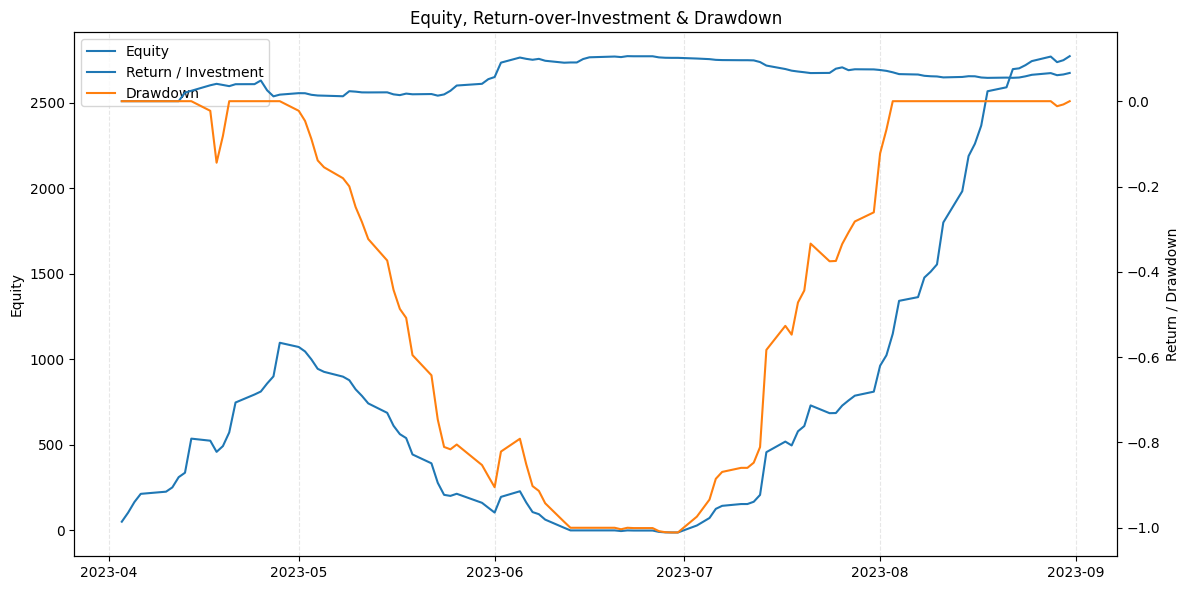

In [242]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12,6))

# --- Left axis: Equity ---
ax1.plot(df_hist.index, df_hist['equity'], label='Equity')
ax1.set_ylabel('Equity')
ax1.tick_params(axis='y')

# --- Right axis: Return over Investment & Drawdown ---
ax2 = ax1.twinx()

if 'return_over_inv' in df_hist.columns:
    ax2.plot(df_hist.index, df_hist['return_over_inv'], label='Return / Investment')

if 'drawdown' in df_hist.columns:
    ax2.plot(df_hist.index, df_hist['drawdown'], label='Drawdown')

ax2.set_ylabel('Return / Drawdown')
ax2.tick_params(axis='y')

# --- Combine legends from both axes ---
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# --- Styling ---
plt.title("Equity, Return-over-Investment & Drawdown")
ax1.grid(True, which='both', axis='x', linestyle='--', alpha=0.3)
plt.xticks(rotation=45)
fig.tight_layout()
plt.show()


In [262]:
trades_r

,train_period,val_period,ticker,date,exit_date,exdate,strike,r_long,r_hat,delta_long,delta_short,signal,signal_num,entry_premium,exit_premium,entry_date,trade_profit,trade_cost,trade_return
0,2023-01 -> 2023-03,2023-04,AAPL,2023-04-03,2023-04-13,2023-05-05,165.0,-0.150000,-0.113699,0.212336,0.008493,short,-1,11.000,9.350,2023-04-03,1.650,11.000,0.150000
1,2023-01 -> 2023-03,2023-04,PLTR,2023-04-03,2023-04-13,2023-05-05,8.5,-0.187215,-0.013605,0.212336,0.008493,short,-1,1.095,0.890,2023-04-03,0.205,1.095,0.187215
2,2023-01 -> 2023-03,2023-04,AMZN,2023-04-03,2023-04-13,2023-05-05,102.0,-0.106888,-0.134077,0.212336,0.008493,short,-1,10.525,9.400,2023-04-03,1.125,10.525,0.106888
3,2023-01 -> 2023-03,2023-04,TSLA,2023-04-03,2023-04-13,2023-05-05,195.0,-0.146903,-0.106289,0.212336,0.008493,short,-1,28.250,24.100,2023-04-03,4.150,28.250,0.146903
4,2023-01 -> 2023-03,2023-04,AAPL,2023-04-04,2023-04-14,2023-05-05,165.0,-0.197727,-0.053626,0.212336,0.008493,short,-1,11.000,8.825,2023-04-04,2.175,11.000,0.197727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,2023-01 -> 2023-07,2023-08,AMD,2023-08-22,2023-08-31,2023-09-22,106.0,-0.272727,-0.160049,0.353194,0.012179,short,-1,11.275,8.200,2023-08-22,3.075,11.275,0.272727
609,2023-01 -> 2023-07,2023-08,AAPL,2023-08-22,2023-08-31,2023-09-22,175.0,0.559677,0.407368,0.353194,0.012179,long,1,9.300,14.505,2023-08-22,5.205,9.300,0.559677
610,2023-01 -> 2023-07,2023-08,NVDA,2023-08-22,2023-08-31,2023-09-22,45.5,-0.276738,-0.029404,0.353194,0.012179,short,-1,70.825,51.225,2023-08-22,19.600,70.825,0.276738
611,2023-01 -> 2023-07,2023-08,SOFI,2023-08-22,2023-08-31,2023-09-22,8.0,-0.080357,-0.115150,0.353194,0.012179,short,-1,1.120,1.030,2023-08-22,0.090,1.120,0.080357


In [243]:
trades_r = signal_summary[signal_summary['signal'].isin(['long', 'short'])].copy()
trades_r['entry_date'] = pd.to_datetime(trades_r['date'])
trades_r['exit_date']  = pd.to_datetime(trades_r['exit_date'])
trades_r = trades_r.sort_values('entry_date').reset_index(drop=True)

if 'entry_premium' not in trades_r.columns:
    raise ValueError("trades_r must contain 'entry_premium'. Merge it in before the sim.")
if 'exit_premium' not in trades_r.columns:
    if 'r_long' in trades_r.columns:
        trades_r['exit_premium'] = trades_r['entry_premium'] * (1.0 + trades_r['r_long'])
    else:
        raise ValueError("Need 'exit_premium' or ('entry_premium' and 'r_long').")

# --- per-trade profit, cost, return ---
# Profit is premium difference; cost is entry premium for both legs
trades_r['trade_profit'] = np.where(
    trades_r['signal'] == 'long',
    trades_r['exit_premium'] - trades_r['entry_premium'],   # long: exit - entry
    trades_r['entry_premium'] - trades_r['exit_premium']    # short: entry - exit
)

trades_r['trade_cost'] = trades_r['entry_premium']

# Avoid div-by-zero; return = profit / cost
trades_r['trade_return'] = np.where(
    trades_r['trade_cost'] > 0,
    trades_r['trade_profit'] / trades_r['trade_cost'],
    np.nan
)

# Cap short returns at +100% relative to premium collected (your rule)
short_mask = trades_r['signal'] == 'short'
trades_r.loc[short_mask, 'trade_return'] = trades_r.loc[short_mask, 'trade_return'].clip(upper=1.0)

# (Optional) append the per-trade return back to signal_summary
# Choose join keys that exist in both frames. Avoid exdate if it causes issues.
merge_keys = ['ticker', 'date', 'exit_date']
if 'strike' in trades_r.columns and 'strike' in signal_summary.columns:
    merge_keys.append('strike')

signal_summary = signal_summary.merge(
    trades_r[merge_keys + ['trade_return']],
    on=merge_keys,
    how='left',
    suffixes=('', '_from_trades')
)


In [244]:
trades_r.to_csv('trades_wtih_ret_v2.csv', index = False)

In [245]:
trades_r

,train_period,val_period,ticker,date,exit_date,exdate,strike,r_long,r_hat,delta_long,delta_short,signal,signal_num,entry_premium,exit_premium,entry_date,trade_profit,trade_cost,trade_return
0,2023-01 -> 2023-03,2023-04,AAPL,2023-04-03,2023-04-13,2023-05-05,165.0,-0.150000,-0.113699,0.212336,0.008493,short,-1,11.000,9.350,2023-04-03,1.650,11.000,0.150000
1,2023-01 -> 2023-03,2023-04,PLTR,2023-04-03,2023-04-13,2023-05-05,8.5,-0.187215,-0.013605,0.212336,0.008493,short,-1,1.095,0.890,2023-04-03,0.205,1.095,0.187215
2,2023-01 -> 2023-03,2023-04,AMZN,2023-04-03,2023-04-13,2023-05-05,102.0,-0.106888,-0.134077,0.212336,0.008493,short,-1,10.525,9.400,2023-04-03,1.125,10.525,0.106888
3,2023-01 -> 2023-03,2023-04,TSLA,2023-04-03,2023-04-13,2023-05-05,195.0,-0.146903,-0.106289,0.212336,0.008493,short,-1,28.250,24.100,2023-04-03,4.150,28.250,0.146903
4,2023-01 -> 2023-03,2023-04,AAPL,2023-04-04,2023-04-14,2023-05-05,165.0,-0.197727,-0.053626,0.212336,0.008493,short,-1,11.000,8.825,2023-04-04,2.175,11.000,0.197727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
608,2023-01 -> 2023-07,2023-08,AMD,2023-08-22,2023-08-31,2023-09-22,106.0,-0.272727,-0.160049,0.353194,0.012179,short,-1,11.275,8.200,2023-08-22,3.075,11.275,0.272727
609,2023-01 -> 2023-07,2023-08,AAPL,2023-08-22,2023-08-31,2023-09-22,175.0,0.559677,0.407368,0.353194,0.012179,long,1,9.300,14.505,2023-08-22,5.205,9.300,0.559677
610,2023-01 -> 2023-07,2023-08,NVDA,2023-08-22,2023-08-31,2023-09-22,45.5,-0.276738,-0.029404,0.353194,0.012179,short,-1,70.825,51.225,2023-08-22,19.600,70.825,0.276738
611,2023-01 -> 2023-07,2023-08,SOFI,2023-08-22,2023-08-31,2023-09-22,8.0,-0.080357,-0.115150,0.353194,0.012179,short,-1,1.120,1.030,2023-08-22,0.090,1.120,0.080357


In [246]:
entries

,ticker,date,exdate,DTE,strike,call_premium,put_premium,straddle_premium,straddle_iv,net_delta,...,total_volume,total_oi,open_interest_call_full,oi_call_lag5_full,open_interest_put_full,oi_put_lag5_full,oi_change_call,oi_change_put,DTE_norm,day_of_week
0,AAPL,2023-01-03,2023-02-03,31,125.0,6.625000,5.875000,12.500,0.429754,0.072719,...,1335.0,1317.0,269.0,NaN,1048.0,NaN,NaN,NaN,0.885714,1
1,AAPL,2023-01-04,2023-02-03,30,126.0,6.275000,5.525000,11.800,0.408581,0.082890,...,1337.0,721.0,342.0,NaN,379.0,NaN,NaN,NaN,0.857143,2
2,AAPL,2023-01-05,2023-02-03,29,125.0,6.075000,5.575000,11.650,0.411546,0.064141,...,25914.0,2190.0,803.0,NaN,1387.0,NaN,NaN,NaN,0.828571,3
3,AAPL,2023-01-06,2023-02-03,28,130.0,5.375000,5.525000,10.900,0.377379,0.034207,...,3426.0,17299.0,16312.0,NaN,987.0,NaN,NaN,NaN,0.800000,4
4,AAPL,2023-01-06,2023-02-10,35,130.0,5.850000,6.000000,11.850,0.369208,0.039350,...,652.0,636.0,535.0,NaN,101.0,NaN,NaN,NaN,1.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2369,TSLA,2023-08-17,2023-09-15,29,220.0,3.841667,3.683333,7.525,0.457044,0.050626,...,16037.0,45501.0,14326.0,13885.0,31175.0,28987.0,0.031761,0.075482,0.828571,3
2370,TSLA,2023-08-18,2023-09-15,28,215.0,11.925000,10.300000,22.225,0.466793,0.086161,...,17505.0,11997.0,2946.0,2710.0,9051.0,5223.0,0.087085,0.732912,0.800000,4
2371,TSLA,2023-08-18,2023-09-22,35,215.0,13.475000,11.600000,25.075,0.471167,0.093355,...,2351.0,2060.0,1390.0,156.0,670.0,319.0,7.910256,1.100313,1.000000,4
2372,TSLA,2023-08-21,2023-09-22,32,230.0,13.900000,11.375000,25.275,0.462823,0.109094,...,1943.0,1739.0,418.0,11.0,1321.0,422.0,37.000000,2.130332,0.914286,0


In [247]:
spl = entries.copy()


Training to Find Weights

In [248]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [249]:
# # spl: needs ['ticker','date','exit_date','exdate','strike',
# #                'call_premium','put_premium'] (or already-renamed entry columns)
# # options_full: full-dates options file with bid/ask & cp_flag

# options_full = options_23.copy()

# # --- 0) Normalize keys ---
# for df in (spl, options_full):
#     for c in ('date','exit_date','exdate'):
#         if c in df.columns:
#             df[c] = pd.to_datetime(df[c], errors='coerce')
#     if 'ticker' in df.columns:
#         df['ticker'] = df['ticker'].astype(str).str.upper()

# # Entry premium column names (rename if needed)
# rename_map = {}
# if 'call_entry_premium' not in spl and 'call_premium' in spl:
#     rename_map['call_premium'] = 'call_entry_premium'
# if 'put_entry_premium' not in spl and 'put_premium' in spl:
#     rename_map['put_premium'] = 'put_entry_premium'
# if rename_map:
#     spl = spl.rename(columns=rename_map)

# # Strike join key (rounded) — must be in the SAME units as options_full['strike_price']
# if 'strike' in spl.columns:
#     spl['strike_key'] = pd.to_numeric(spl['strike'], errors='coerce').round(4)
# elif 'strike_price' in spl.columns:
#     spl['strike_key'] = pd.to_numeric(spl['strike_price'], errors='coerce').round(4)
# else:
#     raise ValueError("Need 'strike' or 'strike_price' in spl.")

# # --- 1) Build a slim exit-quote table from options_full ---
# need_exit_dates = spl['exit_date'].dropna().unique()
# need_exdates    = spl['exdate'].dropna().unique()        # <-- expiration dates
# need_tickers    = spl['ticker'].dropna().unique()

# cols_keep = ['ticker','date','exdate','cp_flag','strike_price']
# if {'adj_best_bid','adj_best_offer'}.issubset(options_full.columns):
#     cols_keep += ['adj_best_bid','adj_best_offer']
# else:
#     cols_keep += ['best_bid','best_offer']

# opt = (options_full[cols_keep]
#        .copy())

# # Filter aggressively for memory/perf:
# opt = opt[
#     opt['ticker'].astype(str).str.upper().isin(need_tickers) &
#     opt['date'].isin(need_exit_dates) &     # observation date = exit date
#     opt['exdate'].isin(need_exdates)        # expiration date = exdate (NOT exit date)
# ]

# opt['ticker'] = opt['ticker'].astype(str).str.upper()
# opt['strike_key'] = pd.to_numeric(opt['strike_price'], errors='coerce').round(4)

# # Mid premium (prefer adjusted if present)
# if {'adj_best_bid','adj_best_offer'}.issubset(opt.columns):
#     opt['mid'] = (opt['adj_best_bid'] + opt['adj_best_offer']) / 2.0
# else:
#     opt['mid'] = (opt['best_bid'] + opt['best_offer']) / 2.0

# # Split by leg and aggregate to one row per contract snapshot
# is_call = opt['cp_flag'].astype(str).str.upper().isin(['C','CALL'])
# is_put  = opt['cp_flag'].astype(str).str.upper().isin(['P','PUT'])

# exit_calls = (opt.loc[is_call, ['ticker','date','exdate','strike_key','mid']]
#                 .groupby(['ticker','date','exdate','strike_key'], as_index=False)['mid']
#                 .mean()
#                 .rename(columns={'date':'exit_date','mid':'call_exit_premium'}))

# exit_puts  = (opt.loc[is_put,  ['ticker','date','exdate','strike_key','mid']]
#                 .groupby(['ticker','date','exdate','strike_key'], as_index=False)['mid']
#                 .mean()
#                 .rename(columns={'date':'exit_date','mid':'put_exit_premium'}))

# # --- 2) Merge exit premiums back into spl ---
# join_keys = ['ticker','exit_date','exdate','strike_key']  # exdate = expiration date (correct)
# spl = spl.merge(exit_calls, on=join_keys, how='left')
# spl = spl.merge(exit_puts,  on=join_keys, how='left')

# # Optional: compute leg returns from entry→exit
# eps = 1e-12
# if {'call_entry_premium','call_exit_premium'}.issubset(spl.columns):
#     spl['r_call'] = (spl['call_exit_premium'] - spl['call_entry_premium']) / \
#                        np.clip(spl['call_entry_premium'], eps, None)
# if {'put_entry_premium','put_exit_premium'}.issubset(spl.columns):
#     spl['r_put'] = (spl['put_exit_premium'] - spl['put_entry_premium']) / \
#                       np.clip(spl['put_entry_premium'], eps, None)

# # `spl` now has:
# #  - call_entry_premium / put_entry_premium  (entry)
# #  - call_exit_premium  / put_exit_premium   (exit looked up on exit_date)
# #  - r_call / r_put (optional)


In [250]:
# ---------- helpers ----------
def to_dt(s): 
    return pd.to_datetime(s, errors='coerce')

def normalize_keys_for_model(df: pd.DataFrame) -> pd.DataFrame:
    m = df.copy()
    if 'ticker' in m.columns:
        m['ticker'] = m['ticker'].astype(str).str.upper()
    for c in ['date','exit_date','exdate']:
        if c in m.columns:
            m[c] = to_dt(m[c])
    if 'strike' in m.columns:
        m['strike_key'] = pd.to_numeric(m['strike'], errors='coerce').round(4)
    else:
        raise ValueError("model_df must have a 'strike' column.")
    return m

def normalize_quotes(df: pd.DataFrame) -> pd.DataFrame:
    q = df.copy()
    if 'ticker' in q.columns:
        q['ticker'] = q['ticker'].astype(str).str.upper()
    for c in ['date','exdate']:
        if c in q.columns:
            q[c] = to_dt(q[c])
    # strike_key
    if 'adj_strike' in q.columns:
        strike_vals = pd.to_numeric(q['adj_strike'], errors='coerce')
    elif 'strike' in q.columns:
        strike_vals = pd.to_numeric(q['strike'], errors='coerce')
    elif 'strike_price' in q.columns:
        strike_vals = pd.to_numeric(q['strike_price'], errors='coerce')
        if strike_vals.dropna().quantile(0.95) > 5000:
            strike_vals = strike_vals / 1000.0
        if 'cfacpr' in q.columns and pd.api.types.is_numeric_dtype(q['cfacpr']):
            with np.errstate(divide='ignore', invalid='ignore'):
                strike_vals = strike_vals / q['cfacpr'].replace(0, np.nan)
        elif 'cfadj' in q.columns and pd.api.types.is_numeric_dtype(q['cfadj']):
            with np.errstate(divide='ignore', invalid='ignore'):
                strike_vals = strike_vals / q['cfadj'].replace(0, np.nan)
    else:
        raise ValueError("options_full must include one of ['adj_strike','strike','strike_price'].")
    q['strike_key'] = strike_vals.round(4)

    # mid price
    bid_col = 'adj_best_bid' if 'adj_best_bid' in q.columns else 'best_bid'
    ask_col = 'adj_best_offer' if 'adj_best_offer' in q.columns else 'best_offer'
    if bid_col not in q.columns or ask_col not in q.columns:
        raise ValueError("Need bid/ask columns.")
    q['mid'] = (pd.to_numeric(q[bid_col], errors='coerce') + 
                pd.to_numeric(q[ask_col], errors='coerce')) / 2.0

    # cp flag
    if 'cp_flag' not in q.columns:
        raise ValueError("options_full must include 'cp_flag'.")
    q['cp_flag_norm'] = q['cp_flag'].astype(str).str.upper().str[0]  # 'C' or 'P'

    keep = ['ticker','date','exdate','strike_key','cp_flag_norm','mid']
    q = q[keep].dropna(subset=['ticker','date','exdate','strike_key','cp_flag_norm'])
    return q

def build_leg_table(q: pd.DataFrame, on_date: str, out_name: str) -> pd.DataFrame:
    t = q.copy()
    if on_date not in t.columns:
        if 'date' in t.columns:
            t = t.rename(columns={'date': on_date})
        else:
            raise KeyError(f"Expected '{on_date}' or 'date' in quotes frame.")
    cols = ['ticker', on_date, 'exdate', 'strike_key', 'cp_flag_norm', 'mid']
    t = t[cols].dropna(subset=['ticker', on_date, 'exdate', 'strike_key'])
    calls = (t[t['cp_flag_norm']=='C']
             .groupby(['ticker', on_date, 'exdate', 'strike_key'], as_index=False)['mid']
             .last()
             .rename(columns={'mid': f'call_{out_name}_premium'}))
    puts  = (t[t['cp_flag_norm']=='P']
             .groupby(['ticker', on_date, 'exdate', 'strike_key'], as_index=False)['mid']
             .last()
             .rename(columns={'mid': f'put_{out_name}_premium'}))
    return calls.merge(puts, on=['ticker', on_date, 'exdate', 'strike_key'], how='outer')



In [251]:
options_full = options_23.copy()

In [252]:
signal_summary

,train_period,val_period,ticker,date,exit_date,exdate,strike,r_long,r_hat,delta_long,delta_short,signal,signal_num,entry_premium,exit_premium,trade_return
0,2023-01 -> 2023-03,2023-04,AAPL,2023-04-03,2023-04-13,2023-05-05,165.0,-0.150000,-0.113699,0.212336,0.008493,short,-1,11.000,9.350,0.150000
1,2023-01 -> 2023-03,2023-04,AAPL,2023-04-04,2023-04-14,2023-05-05,165.0,-0.197727,-0.053626,0.212336,0.008493,short,-1,11.000,8.825,0.197727
2,2023-01 -> 2023-03,2023-04,AAPL,2023-04-05,2023-04-17,2023-05-05,165.0,-0.205607,-0.065254,0.212336,0.008493,short,-1,10.700,8.500,0.205607
3,2023-01 -> 2023-03,2023-04,AAPL,2023-04-06,2023-04-18,2023-05-05,165.0,-0.190361,-0.237167,0.212336,0.008493,short,-1,10.375,8.400,0.190361
4,2023-01 -> 2023-03,2023-04,AAPL,2023-04-10,2023-04-19,2023-05-12,162.5,-0.067556,-0.045710,0.212336,0.008493,short,-1,11.250,10.490,0.067556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1486,2023-01 -> 2023-07,2023-08,TSLA,2023-08-18,2023-08-29,2023-09-15,215.0,0.959505,-0.066090,0.353194,0.012179,short,-1,22.225,43.550,-0.959505
1487,2023-01 -> 2023-07,2023-08,TSLA,2023-08-18,2023-08-29,2023-09-22,215.0,0.789232,-0.093359,0.353194,0.012179,short,-1,25.075,44.865,-0.789232
1488,2023-01 -> 2023-07,2023-08,TSLA,2023-08-18,2023-08-29,2023-09-22,215.0,0.789232,-0.093359,0.353194,0.012179,short,-1,25.075,44.865,-0.959505
1489,2023-01 -> 2023-07,2023-08,TSLA,2023-08-21,2023-08-30,2023-09-22,230.0,0.309594,0.051748,0.353194,0.012179,skip,0,25.275,33.100,NaN


In [253]:
options_full

,Unnamed: 0,secid,date,symbol,symbol_flag,exdate,last_date,cp_flag,strike_price,best_bid,...,am_settlement,contract_size,ss_flag,forward_price,expiry_indicator,root,suffix,ticker,adj_best_bid,adj_best_offer
0,0,101121.0,2023-05-19,AMD 230519C100000,1,2023-05-19,2023-05-19,C,100.0,5.85,...,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD,5.85,5.95
1,1,101121.0,2023-05-19,AMD 230519C101000,1,2023-05-19,2023-05-19,C,101.0,4.90,...,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD,4.90,4.95
2,2,101121.0,2023-05-19,AMD 230519C102000,1,2023-05-19,2023-05-19,C,102.0,3.85,...,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD,3.85,3.95
3,3,101121.0,2023-05-19,AMD 230519C103000,1,2023-05-19,2023-05-19,C,103.0,2.89,...,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD,2.89,2.95
4,4,101121.0,2023-05-19,AMD 230519C104000,1,2023-05-19,2023-05-19,C,104.0,1.89,...,0.0,100.0,0,NaN,NaN,NaN,NaN,AMD,1.89,1.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5005319,5005319,216684.0,2023-08-07,RIVN 251219P35000,1,2025-12-19,2023-08-01,P,35.0,16.10,...,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN,16.10,16.70
5005320,5005320,216684.0,2023-08-07,RIVN 251219P37500,1,2025-12-19,2023-07-21,P,37.5,18.05,...,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN,18.05,18.60
5005321,5005321,216684.0,2023-08-07,RIVN 251219P40000,1,2025-12-19,2023-08-07,P,40.0,19.75,...,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN,19.75,20.45
5005322,5005322,216684.0,2023-08-07,RIVN 251219P5000,1,2025-12-19,2023-08-03,P,5.0,0.78,...,0.0,100.0,0,NaN,NaN,NaN,NaN,RIVN,0.78,0.96


In [254]:
model_df_2 = model_df.copy()

In [255]:
import random, numpy as np
random.seed(37)
np.random.seed(37)

# =========================================================
# 1) Normalize inputs & compute entry/exit premiums
# =========================================================
mdf = normalize_keys_for_model(model_df_2)
qdf = normalize_quotes(options_full)

entry_legs = build_leg_table(qdf, on_date='date', out_name='entry')
exit_q     = qdf.rename(columns={'date':'exit_date'})
exit_legs  = build_leg_table(exit_q, on_date='exit_date', out_name='exit')

merge_keys = ['ticker','exdate','strike_key']
if 'date' not in mdf.columns or 'exit_date' not in mdf.columns:
    raise ValueError("model_df_2 must include 'date' and 'exit_date' for leg matching.")

# merged universe (do NOT filter yet)
mdf_merged = (
    mdf.merge(entry_legs, on=merge_keys + ['date'],      how='left')
       .merge(exit_legs,  on=merge_keys + ['exit_date'], how='left')
)

# ---- compute r_call/r_put on the merged universe
eps = 1e-12
if not {'r_call','r_put'}.issubset(mdf_merged.columns):
    need = {'call_entry_premium','put_entry_premium','call_exit_premium','put_exit_premium'}
    missing = need - set(mdf_merged.columns)
    if missing:
        raise ValueError(f"Missing leg premium columns after merge: {missing}")
    mdf_merged['r_call'] = (mdf_merged['call_exit_premium'] - mdf_merged['call_entry_premium']) / mdf_merged['call_entry_premium'].clip(lower=eps)
    mdf_merged['r_put']  = (mdf_merged['put_exit_premium']  - mdf_merged['put_entry_premium'])  / mdf_merged['put_entry_premium'].clip(lower=eps)

# =========================================================
# 2) Build the SIGNAL SET but don't shrink the month calendar
# =========================================================
sig = signal_summary.copy()
sig['ticker'] = sig['ticker'].astype(str).str.upper()
for c in ['date','exit_date','exdate']:
    if c in sig.columns:
        sig[c] = to_dt(sig[c])
if 'strike' in sig.columns and 'strike_key' not in sig.columns:
    sig['strike_key'] = pd.to_numeric(sig['strike'], errors='coerce').round(4)
sig_exec = sig[sig['signal'].isin(['long','short'])].copy()

# =========================================================
# 3) Feature set + label on the merged universe
# =========================================================
mdf_merged['y'] = (mdf_merged['r_call'] > mdf_merged['r_put']).astype(int)

candidate_features = [
    'straddle_iv','iv_realized_vol_ratio','iv_rank',
    'realized_vol_30','realized_vol_30_rank',
    'vol_change','mom_5','mom_10',
    'iv_skew','log_straddle_premium',
    'spread_call','spread_put',
    'total_volume','total_oi',
    'oi_change_call','oi_change_put',
    'DTE_norm','day_of_week','net_delta'
]
feature_columns = [c for c in candidate_features if c in mdf_merged.columns and pd.api.types.is_numeric_dtype(mdf_merged[c])]

# <<< FIX: build the month calendar BEFORE filtering to signals >>>
mdf_merged['ym'] = mdf_merged['date'].dt.to_period('M')
months_all = sorted(mdf_merged['ym'].dropna().unique())  # this will include early months

# =========================================================
# 4) Walk-forward training using full calendar; validate on signals only
# =========================================================
from sklearn.ensemble import HistGradientBoostingClassifier

INITIAL_TRAIN_MONTHS = 3
VAL_MONTHS = 1

fold_summaries, weights_out = [], []

for i in range(INITIAL_TRAIN_MONTHS, len(months_all) - VAL_MONTHS + 1):
    tr_months = months_all[:i]
    va_months = months_all[i:i+VAL_MONTHS]

    # TRAIN on all rows in the training window (unfiltered)
    train = mdf_merged[mdf_merged['ym'].isin(tr_months)].dropna(subset=feature_columns + ['y'])
    if train.empty:
        continue

    # VALIDATE only on EXECUTED (signaled) rows in the validation window
    val_all = mdf_merged[mdf_merged['ym'].isin(va_months)].dropna(subset=feature_columns + ['y','r_call','r_put'])
    join_keys = [k for k in ['ticker','date','exdate','strike_key'] if k in val_all.columns and k in sig_exec.columns]
    val = val_all.merge(sig_exec[join_keys], on=join_keys, how='inner') if join_keys else val_all.iloc[0:0]
    if val.empty:
        continue

    X_tr = train[feature_columns].to_numpy()
    y_tr = train['y'].to_numpy()
    X_va = val[feature_columns].to_numpy()

    clf = HistGradientBoostingClassifier(
        random_state=42, max_iter=400, learning_rate=0.05,
        max_leaf_nodes=31, early_stopping=True,
        validation_fraction=0.1, n_iter_no_change=20,
    )
    clf.fit(X_tr, y_tr)

    p_call = clf.predict_proba(X_va)[:, 1]
    alpha_call = p_call
    alpha_put  = 1.0 - p_call

    r_c = val['r_call'].to_numpy()
    r_p = val['r_put'].to_numpy()

    realized_profit_per_1 = alpha_call * r_c + alpha_put * r_p
    baseline_profit_per_1 = 0.5 * r_c + 0.5 * r_p

    fold_ret  = np.nansum(realized_profit_per_1)
    fold_mean = np.nanmean(realized_profit_per_1)
    fold_std  = np.nanstd(realized_profit_per_1, ddof=0)
    fold_sharpe = (fold_mean / fold_std) * np.sqrt(252) if fold_std > 0 else np.nan

    base_ret  = np.nansum(baseline_profit_per_1)
    base_mean = np.nanmean(baseline_profit_per_1)
    base_std  = np.nanstd(baseline_profit_per_1, ddof=0)
    base_sharpe = (base_mean / base_std) * np.sqrt(252) if base_std > 0 else np.nan

    fold_summaries.append({
        'train_period': f"{tr_months[0]} -> {tr_months[-1]}",
        'val_period': f"{va_months[0]}",
        'num_trades': int(len(val)),
        'total_profit_per_1': float(fold_ret),
        'avg_profit_per_1': float(fold_mean) if np.isfinite(fold_mean) else np.nan,
        'sharpe_per_trade_annualized': float(fold_sharpe) if np.isfinite(fold_sharpe) else np.nan,
        'baseline_total_profit_per_1': float(base_ret),
        'baseline_sharpe_annual': float(base_sharpe) if np.isfinite(base_sharpe) else np.nan,
        'model': clf,
        'features_used': feature_columns,
    })

    keep_keys = [c for c in ['ticker','date','exdate','strike','strike_key'] if c in val.columns]
    wdf = val[keep_keys + ['r_call','r_put']].copy()
    wdf['alpha_call'] = alpha_call
    wdf['alpha_put']  = 1.0 - alpha_call
    wdf['profit_per_1'] = realized_profit_per_1
    wdf['p_call'] = p_call
    weights_out.append(wdf)

summary_df = pd.DataFrame(fold_summaries)
weights_df = pd.concat(weights_out, ignore_index=True) if weights_out else pd.DataFrame()

print("Fold-level performance:")
cols = ['train_period','val_period','num_trades',
        'total_profit_per_1','avg_profit_per_1',
        'sharpe_per_trade_annualized',
        'baseline_total_profit_per_1','baseline_sharpe_annual']
print(summary_df[cols])

print("\nAggregate metrics:")
print("Sum of fold profits per $1:",
      np.nansum(summary_df['total_profit_per_1'].to_numpy()))
print("Mean Sharpe per trade (annualized):",
      np.nanmean(summary_df['sharpe_per_trade_annualized'].to_numpy()))


Fold-level performance:
         train_period val_period  num_trades  total_profit_per_1  \
0  2023-01 -> 2023-03    2023-04         170           -5.090640   
1  2023-01 -> 2023-04    2023-05         155           32.697619   
2  2023-01 -> 2023-05    2023-06          66           15.981901   
3  2023-01 -> 2023-06    2023-07         122           -3.653600   
4  2023-01 -> 2023-07    2023-08         124           -0.819583   

   avg_profit_per_1  sharpe_per_trade_annualized  baseline_total_profit_per_1  \
0         -0.029945                    -1.156308                    -9.773287   
1          0.210952                     6.156373                    27.291438   
2          0.242150                     5.766324                     5.923298   
3         -0.029948                    -1.074638                    -2.687282   
4         -0.006610                    -0.233466                    -1.350324   

   baseline_sharpe_annual  
0               -4.195917  
1                5.59749

In [256]:
weights_df

,ticker,date,exdate,strike,strike_key,r_call,r_put,alpha_call,alpha_put,profit_per_1,p_call
0,AAPL,2023-04-03,2023-05-05,165.0,165.0,-0.197674,-0.082418,0.795544,0.204456,-0.174109,0.795544
1,AAPL,2023-04-04,2023-05-05,165.0,165.0,-0.225410,-0.163265,0.907584,0.092416,-0.219667,0.907584
2,AAPL,2023-04-05,2023-05-05,165.0,165.0,-0.107843,-0.294643,0.648335,0.351665,-0.173534,0.648335
3,AAPL,2023-04-06,2023-05-05,165.0,165.0,-0.014151,-0.374384,0.630555,0.369445,-0.147237,0.630555
4,AAPL,2023-04-10,2023-05-12,162.5,162.5,0.441441,-0.563158,0.814012,0.185988,0.254598,0.814012
...,...,...,...,...,...,...,...,...,...,...,...
632,TSLA,2023-08-18,2023-09-15,215.0,215.0,2.607966,-0.949029,0.830918,0.169082,2.006544,0.830918
633,TSLA,2023-08-18,2023-09-15,215.0,215.0,2.607966,-0.949029,0.830918,0.169082,2.006544,0.830918
634,TSLA,2023-08-18,2023-09-22,215.0,215.0,2.250464,-0.908190,0.336342,0.663658,0.154198,0.336342
635,TSLA,2023-08-18,2023-09-22,215.0,215.0,2.250464,-0.908190,0.336342,0.663658,0.154198,0.336342


In [268]:
# =========================================================
# Keep ONLY validation straddles we execute, then compute weighted P&L
# Requires: signal_summary, entry_legs, exit_legs, weights_df
# =========================================================

def _to_dt(x): 
    return pd.to_datetime(x, errors='coerce')

def _num(s): 
    return pd.to_numeric(s, errors='coerce')

# ---------- 0) Build “executed signals” table ----------
# (only long/short rows from signal_summary; normalize keys)
exec_df = signal_summary[signal_summary['signal'].isin(['long','short'])].copy()
if exec_df.empty:
    raise ValueError("No executed signals in signal_summary (no 'long'/'short').")

exec_df['ticker'] = exec_df['ticker'].astype(str).str.upper()
for c in ['date','exit_date','exdate']:
    if c in exec_df.columns:
        exec_df[c] = _to_dt(exec_df[c])

# unify strike_key across frames for robust matches
if 'strike_key' not in exec_df.columns:
    if 'strike' not in exec_df.columns:
        raise ValueError("signal_summary must contain 'strike' or 'strike_key'.")
    exec_df['strike_key'] = _num(exec_df['strike']).round(4)

# ---------- 1) Build validation keys from weights_df ----------
w = weights_df.copy()
if w.empty:
    raise ValueError("weights_df is empty; ensure you created it from validation folds.")

w['ticker'] = w['ticker'].astype(str).str.upper()
for c in ['date','exdate']:
    if c in w.columns:
        w[c] = _to_dt(w[c])
if 'strike_key' not in w.columns:
    if 'strike' not in w.columns:
        raise ValueError("weights_df must have 'strike' or 'strike_key'.")
    w['strike_key'] = _num(w['strike']).round(4)

# Keep only columns we need to identify the validation universe
val_keys = w[['ticker','exdate','strike_key']].dropna().drop_duplicates()

# ---------- 2) INTERSECTION: executed ∩ validation universe ----------
# (match by ticker, exdate, strike as requested)
keep_cols = ['ticker','exdate','strike_key']
val_exec = exec_df.merge(val_keys, on=keep_cols, how='inner')

# If you also want to ensure date alignment with the validation month,
# leave as-is (dates already come from signal_summary). This step alone
# cuts the universe before any heavy merges.
# print(f"[info] rows before: {len(exec_df):,}  after filter: {len(val_exec):,}")

# ---------- 3) Merge leg quotes ONLY for filtered rows ----------
# entry_legs must have: ['ticker','date','exdate','strike_key','call_entry_premium','put_entry_premium']
# exit_legs  must have: ['ticker','exit_date','exdate','strike_key','call_exit_premium','put_exit_premium']

for req in ['ticker','date','exdate','strike_key','call_entry_premium','put_entry_premium']:
    if req not in entry_legs.columns:
        raise ValueError(f"`entry_legs` missing column: {req}")
for req in ['ticker','exit_date','exdate','strike_key','call_exit_premium','put_exit_premium']:
    if req not in exit_legs.columns:
        raise ValueError(f"`exit_legs` missing column: {req}")

val_exec = val_exec.merge(
    entry_legs[['ticker','date','exdate','strike_key','call_entry_premium','put_entry_premium']],
    on=['ticker','date','exdate','strike_key'], how='left'
).merge(
    exit_legs[['ticker','exit_date','exdate','strike_key','call_exit_premium','put_exit_premium']],
    on=['ticker','exit_date','exdate','strike_key'], how='left'
)

# ---------- 4) Merge weights (probability as call weight) ----------
wk = ['ticker','date','exdate','strike_key']
if not set(wk).issubset(w.columns):
    # relax to keys available, but we still keep (ticker, exdate, strike_key)
    wk = [k for k in wk if k in w.columns]

# make sure alpha_call exists
if 'alpha_call' not in w.columns and 'p_call' in w.columns:
    w = w.rename(columns={'p_call':'alpha_call'})
if 'alpha_call' not in w.columns:
    raise ValueError("weights_df must contain 'alpha_call' (or 'p_call').")
if 'alpha_put' not in w.columns:
    w['alpha_put'] = 1.0 - w['alpha_call']

val_exec = val_exec.merge(
    w[wk + ['alpha_call','alpha_put']].drop_duplicates(),
    on=wk, how='left'
)

# default any missing weights to 50/50 (should be rare after the filter)
val_exec['alpha_call'] = val_exec['alpha_call'].fillna(0.5).clip(0.0, 1.0)
val_exec['alpha_put']  = val_exec['alpha_put'].fillna(1.0 - val_exec['alpha_call']).clip(0.0, 1.0)

# ---------- 5) Weighted entry/exit, profit, return (+100% cap for shorts) ----------
eps = 1e-12
ce = _num(val_exec['call_entry_premium']).clip(lower=eps)
pe = _num(val_exec['put_entry_premium']).clip(lower=eps)
cx = _num(val_exec['call_exit_premium'])
px = _num(val_exec['put_exit_premium'])

alpha = val_exec['alpha_call']
beta  = val_exec['alpha_put']

# total entry premium (capital per trade)
entry_premium = ce + pe
val_exec['weighted_entry'] = entry_premium

# leg ratios & weighted ratio
ratio_c = cx / ce
ratio_p = px / pe
weighted_ratio = alpha * ratio_c + beta * ratio_p

# compute direction-aware P&L
is_long  = val_exec['signal'].eq('long')
is_short = val_exec['signal'].eq('short')

exit_value_long = entry_premium * weighted_ratio
buyback_short   = entry_premium * weighted_ratio

profit = pd.Series(0.0, index=val_exec.index)
profit[is_long]  = exit_value_long[is_long] - entry_premium[is_long]
profit[is_short] = entry_premium[is_short] - buyback_short[is_short]

ret = profit / entry_premium.clip(lower=eps)
ret.loc[is_short] = ret.loc[is_short].clip(upper=1.0)  # cap shorts at +100%

val_exec['weighted_exit']  = np.where(is_long, exit_value_long, buyback_short)
val_exec['trade_profit_w'] = profit
val_exec['trade_return_w'] = ret

# ---------- 6) Done: `val_exec` now contains ONLY the validation straddles you execute ----------
# Keep a compact set of columns for reporting
report_cols = [c for c in [
    'ticker','date','exit_date','exdate','strike','strike_key','signal',
    'alpha_call','alpha_put',
    'call_entry_premium','put_entry_premium','call_exit_premium','put_exit_premium',
    'weighted_entry','weighted_exit','trade_profit_w','trade_return_w'
] if c in val_exec.columns]

trades_w_r_filtered = val_exec[report_cols].sort_values(['date','ticker','strike_key']).reset_index(drop=True)

print(f"[kept] {len(trades_w_r_filtered):,} validation executed straddles "
      f"(from {len(signal_summary):,} rows in signal_summary).")
print(trades_w_r_filtered.head(10))


[kept] 637 validation executed straddles (from 1,491 rows in signal_summary).
  ticker       date  exit_date     exdate  strike  strike_key signal  \
0   AAPL 2023-04-03 2023-04-13 2023-05-05   165.0       165.0  short   
1   AMZN 2023-04-03 2023-04-13 2023-05-05   102.0       102.0  short   
2   PLTR 2023-04-03 2023-04-13 2023-05-05     8.5         8.5  short   
3   TSLA 2023-04-03 2023-04-13 2023-05-05   195.0       195.0  short   
4   AAPL 2023-04-04 2023-04-14 2023-05-05   165.0       165.0  short   
5  GOOGL 2023-04-04 2023-04-14 2023-05-05   105.0       105.0  short   
6   MARA 2023-04-04 2023-04-14 2023-05-05     8.5         8.5  short   
7    NIO 2023-04-04 2023-04-14 2023-05-05     9.0         9.0  short   
8   SOFI 2023-04-04 2023-04-14 2023-05-05     6.0         6.0  short   
9   TSLA 2023-04-04 2023-04-14 2023-05-05   192.5       192.5  short   

   alpha_call  alpha_put  call_entry_premium  put_entry_premium  \
0    0.795544   0.204456               6.450              4.55

In [269]:
trades_w_r_filtered.to_csv('weighted_trades_ret_23.csv', index = False)

In [259]:
# # ============================================
# # 0) Load / assume dataframes exist
# # ============================================
# # Expect:
# #   trades -> trades_with_ret-style DF with leg premiums (call/put entry/exit) and keys (ticker/date[/exdate]/strike)
# #   feats  -> entries-with-features DF with same keys + feature columns
# # If you already have them, just keep using your in-memory dataframes.
# # Example placeholders:
# # feats = spl.copy()   # your feature frame
# # trades = trades_df   # your trades frame

# # ============================================
# # 1) Hygiene & merge
# # ============================================
# def _to_dt(x):
#     return pd.to_datetime(x, errors='coerce')

# def normalize_keys(df: pd.DataFrame) -> pd.DataFrame:
#     df = df.copy()
#     if 'ticker' in df.columns:
#         df['ticker'] = df['ticker'].astype(str).str.upper()
#     for c in ['date','exit_date','exdate']:
#         if c in df.columns:
#             df[c] = _to_dt(df[c])
#     if 'strike' in df.columns:
#         df['strike'] = pd.to_numeric(df['strike'], errors='coerce').round(4)
#     return df

# trades = trades_brefore.copy()
# feats = spl.copy()

# trades = normalize_keys(trades)
# feats  = normalize_keys(feats)

# # robust merge keys: prefer including exdate if present on both sides
# merge_keys = ['ticker','date','strike']
# if 'exdate' in trades.columns and 'exdate' in feats.columns:
#     merge_keys = ['ticker','date','exdate','strike']

# # Minimal feature columns to bring (drop raw quotes to reduce width)
# feat_cols_keep = [c for c in feats.columns if c not in {
#     'adj_best_bid_call','adj_best_offer_call','adj_best_bid_put','adj_best_offer_put'
# }]

# merged = trades.merge(feats[feat_cols_keep], on=merge_keys, how='left', suffixes=('', '_feat'))

# # CHANGED: De-duplicate column names right after merge to avoid "label not unique"
# merged = merged.loc[:, ~merged.columns.duplicated()].copy()

# # ============================================
# # 2) Leg returns & edge target
# # ============================================
# COLS = {
#     'ce': 'call_entry_premium',
#     'cx': 'call_exit_premium',
#     'pe': 'put_entry_premium',
#     'px': 'put_exit_premium',
# }
# for k in COLS.values():
#     if k not in merged.columns:
#         raise ValueError(f"Missing required leg column: {k} (adjust COLS mapping if names differ)")

# for c in [COLS['ce'], COLS['cx'], COLS['pe'], COLS['px']]:
#     merged[c] = pd.to_numeric(merged[c], errors='coerce')

# eps = 1e-12
# merged['r_call'] = (merged[COLS['cx']] - merged[COLS['ce']]) / merged[COLS['ce']].clip(lower=eps)
# merged['r_put']  = (merged[COLS['px']] - merged[COLS['pe']]) / merged[COLS['pe']].clip(lower=eps)

# # target = which leg outperforms per $1 (alpha*rcall + (1-alpha)*rput). Edge = r_call - r_put
# merged['edge'] = merged['r_call'] - merged['r_put']

# # ============================================
# # 3) Build modeling frame
# # ============================================
# candidate_features = [
#     'straddle_iv', 'iv_realized_vol_ratio', 'iv_rank',
#     'realized_vol_30', 'realized_vol_30_rank',
#     'vol_change', 'mom_5', 'mom_10',
#     'iv_skew', 'log_straddle_premium',
#     'spread_call', 'spread_put',
#     'total_volume', 'total_oi',
#     'oi_change_call', 'oi_change_put',
#     'DTE_norm', 'day_of_week', 'net_delta'
# ]

# feat_used = [c for c in candidate_features if c in merged.columns]
# # keep numeric only
# feat_used = [c for c in feat_used if pd.api.types.is_numeric_dtype(merged[c])]

# # CHANGED: Build a unique list of ID columns (avoid duplicates like ['ticker','date'] + merge_keys)
# id_cols_pref = ['ticker','date','exdate','strike']
# id_cols = [c for c in id_cols_pref if c in merged.columns]
# id_cols = list(dict.fromkeys(id_cols))  # unique, order-preserving

# model_df = merged[id_cols + feat_used + ['edge','r_call','r_put']].copy()
# model_df = model_df.dropna(subset=feat_used + ['edge']).reset_index(drop=True)

# # CHANGED: De-duplicate model_df columns to prevent date/ticker duplicates later
# model_df = model_df.loc[:, ~model_df.columns.duplicated()].copy()

# # ============================================
# # 4) Walk-forward + model + threshold → weights α
# # ============================================
# def make_walk_forward_splits(df, date_col="date", initial_train_months=6, val_months=1):
#     df = df.copy()
#     df[date_col] = _to_dt(df[date_col])
#     df['ym'] = df[date_col].dt.to_period('M')
#     months = sorted(df['ym'].dropna().unique())
#     for i in range(initial_train_months, len(months) - val_months + 1):
#         train_months = months[:i]
#         val_months_  = months[i:i+val_months]
#         tr_idx = df[df['ym'].isin(train_months)].index
#         va_idx = df[df['ym'].isin(val_months_)].index
#         yield tr_idx, va_idx, train_months, val_months_

# def tune_edge_threshold(edge_hat, r_call, r_put, grid=21):
#     # pick δ so we trade only when |edge_hat| > δ
#     # map to weights: α=1 (call) if edge_hat>δ; α=0 (put) if edge_hat<−δ; α=0.5 otherwise
#     finite = np.isfinite(edge_hat)
#     abs95 = (np.nanquantile(np.abs(edge_hat[finite]), 0.95)
#              if finite.any() else 0.0)
#     if not np.isfinite(abs95) or abs95 <= 0:
#         abs95 = 0.0
#     candidates = np.linspace(0.0, abs95, grid)
#     best_delta, best_ret = 0.0, -np.inf
#     rc, rp = np.asarray(r_call), np.asarray(r_put)
#     for d in candidates:
#         alpha = np.where(edge_hat > d, 1.0,
#                  np.where(edge_hat < -d, 0.0, 0.5))
#         ret = np.nan_to_num(alpha * rc + (1 - alpha) * rp).sum()
#         if ret > best_ret:
#             best_ret, best_delta = ret, d
#     return float(best_delta)

# INITIAL_TRAIN_MONTHS = 3
# VAL_MONTHS = 1
# GRID_SIZE = 30

# results = []
# weights_out = []

# for tr_idx, va_idx, tr_m, va_m in make_walk_forward_splits(
#     model_df, date_col='date', initial_train_months=INITIAL_TRAIN_MONTHS, val_months=VAL_MONTHS
# ):
#     train = model_df.loc[tr_idx].dropna(subset=feat_used + ['edge'])
#     val   = model_df.loc[va_idx].dropna(subset=feat_used + ['edge'])

#     if train.empty or val.empty:
#         continue

#     X_tr = train[feat_used].to_numpy()
#     y_tr = train['edge'].to_numpy()
#     X_va = val[feat_used].to_numpy()

#     model = HistGradientBoostingRegressor(
#         random_state=42,
#         max_iter=400,
#         learning_rate=0.05,
#         max_leaf_nodes=31,
#         early_stopping=True,
#         validation_fraction=0.1,
#         n_iter_no_change=20,
#     )
#     model.fit(X_tr, y_tr)

#     edge_hat = model.predict(X_va)
#     delta_edge = tune_edge_threshold(edge_hat, val['r_call'].to_numpy(), val['r_put'].to_numpy(), grid=GRID_SIZE)

#     alpha = np.where(edge_hat >  delta_edge, 1.0,
#              np.where(edge_hat < -delta_edge, 0.0, 0.5)).astype(float)
#     realized_profit_per_1 = alpha * val['r_call'].to_numpy() + (1 - alpha) * val['r_put'].to_numpy()

#     fold_ret  = np.nansum(realized_profit_per_1)
#     fold_mean = np.nanmean(realized_profit_per_1) if realized_profit_per_1.size > 0 else np.nan
#     fold_std  = np.nanstd(realized_profit_per_1, ddof=0) if realized_profit_per_1.size > 0 else np.nan
#     fold_sharpe = (fold_mean / fold_std) * np.sqrt(252) if (fold_std and fold_std > 0) else np.nan

#     results.append({
#         'train_period': f"{tr_m[0]} -> {tr_m[-1]}",
#         'val_period': f"{va_m[0]}",
#         'delta_edge': float(delta_edge),
#         'total_profit_per_1': float(fold_ret),
#         'avg_profit_per_1': float(fold_mean) if np.isfinite(fold_mean) else np.nan,
#         'sharpe_per_trade_annualized': float(fold_sharpe) if np.isfinite(fold_sharpe) else np.nan,
#         'num_trades': int(len(val)),
#         'model': model,
#     })

#     # CHANGED: Build key cols from what's actually present in `val` to avoid duplicates
#     key_cols = [c for c in ['ticker','date','exdate','strike'] if c in val.columns]
#     key_cols = list(dict.fromkeys(key_cols))  # unique, ordered

#     # CHANGED: Keep only keys + r_call/r_put (no duplicated keys)
#     cols_for_wdf = key_cols + [c for c in ['r_call','r_put'] if c in val.columns]
#     wdf = val.loc[:, cols_for_wdf].copy()

#     wdf['alpha_call'] = alpha
#     wdf['alpha_put']  = 1.0 - alpha
#     wdf['edge_hat']   = edge_hat
#     wdf['delta_edge'] = float(delta_edge)
#     wdf['realized_profit_per_1'] = realized_profit_per_1
#     weights_out.append(wdf)

# # ============================================
# # 5) Outputs: fold summary + merge weights back
# # ============================================
# summary_df = pd.DataFrame(results)
# weights_df = pd.concat(weights_out, ignore_index=True) if weights_out else pd.DataFrame()

# # CHANGED: De-dup columns on both sides before merging to avoid "label not unique"
# merged     = merged.loc[:, ~merged.columns.duplicated()].copy()
# weights_df = weights_df.loc[:, ~weights_df.columns.duplicated()].copy()

# # CHANGED: Build final join keys as intersection present on both sides
# key_cols_final = [c for c in ['ticker','date','exdate','strike'] if c in merged.columns and c in weights_df.columns]
# key_cols_final = list(dict.fromkeys(key_cols_final))

# trades_with_weights = merged.merge(
#     weights_df,
#     on=key_cols_final,
#     how='left',
#     suffixes=('', '_w')
# )

# # realized profit per $1 invested using learned weights
# if 'realized_profit_per_1' in trades_with_weights.columns:
#     trades_with_weights['profit_per_1'] = trades_with_weights['realized_profit_per_1']

# # ============================================
# # 6) Print summary
# # ============================================
# print("Fold-level performance:")
# cols_show = ['train_period','val_period','delta_edge',
#              'total_profit_per_1','avg_profit_per_1',
#              'sharpe_per_trade_annualized','num_trades']
# print(summary_df[cols_show])

# print("\nAggregate metrics:")
# print("Total profit per $1 (sum of folds):", np.nansum(summary_df['total_profit_per_1'].to_numpy()))
# print("Mean Sharpe per trade (annualized):", np.nanmean(summary_df['sharpe_per_trade_annualized'].to_numpy()))


In [260]:
# === summary ===
print(f"Final net worth: {final_net:.4f}")
print(f"Cumulative return: {df_hist['return_over_inv'].iloc[-1]:.2%}")
print(f"Annualized Sharpe (daily): {sharpe_annual:.2f}")

NameError: name 'final_net' is not defined